<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Classification (Part 1 EDA)
#### Members:Jia Sheng | Wei Hao 

 - [Problem Statement](#Problem-Statement)
 - [Executive Summary](#Executive-Summary)
 - [Methodology](#Methodology)
 - [Datasets](#Datasets)
 - [Data Import](#Data-Import)
 - [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Problem Statement

The Chicago Department of Public Health (CDPH) has set up a surveillance and control system to catch mosquitos and test for the presence of WNV in the aftermath of the city's recent WNV outbreak. The purpose of this study is to use surveillance data to forecast WNV outbreaks based on date, location, mosquito type, and weather characteristics. The findings of this study will be utilized to improve resource allocation and effectively prevent the spread of this potentially deadly infection. Success is defined as the final model's capacity to offer a sufficiently high level of classification accuracy based on the following two measures:

- Sensitivity: Refers to the true positive rate and summarizes how well the positive class (WnvPresnet) is predicted, particularly useful metric for imabalance classification dataset

- AUC ROC score: The Area Under the Curve (AUC) - ROC curve is a performance statistic for classification issues at various threshold levels. AUC represents the degree or measure of separability, whereas ROC is a probability curve. It indicates how well the model can distinguish between classes. The AUC indicates how well the model predicts 0 classes as 0 and 1 courses as 1. The higher the AUC, the better the model predicts 0 classes as 0 and 1 classes as 1.

## Executive Summary

The mosquito-borne zoonotic illness West Nile virus (WNV) was first discovered in the United States in New York City in the summer of 1999. WNV swiftly adapted to local populations of Culex vector mosquitoes and bird populations after its first successful invasion in New York, and it soon expanded across the United States ([*source1*](https://www.cdc.gov/mmwr/preview/mmwrhtml/ss5902a1.htm)).

While WNV is not particularly virulent, with only around 1 in every 150 people infected developing West Nile fever and its symptoms, it is a severe and sometimes fatal disease (CDC, 2009). There is no vaccine available to protect against WNV at this time.

A well-executed data-driven strategy can generate detailed insights. In this study, we will attempt to develop an accurate and reliable machine-learning model using classification modeling techniques to aid in resource allocations of where and when pesticides should be applied around the city to maximize pesticide effectiveness at the lowest cost.

Six classification models were developed for this binary classification project: Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors, Support Vector Machines and Gradient Boosting with sensitivity and AUC score used to determine success.

After hyperparameter tuning, both the Logistic and SVC models perform equally well when it comes to training and testing gridsearch metric scores. However, we picked the logistic regression model as our final model in this study because it is the simplest/easiest model for the audience to understand.

Moving forward, recommendation to improve the model as follows:
- Due to a lack of spraying data, drawing any conclusions on the efficiency of pesticide spray in reducing mosquito populations is difficult. To better understand the effect of pesticide on mosquitoes and investigate the effective time of the spray, it is recommended that spraying begin in early summer and continue until late July/early August, when the number of mosquitoes normally peaks.

## Methodology 

Following Blitzstein & Pfister’s workflow ([*source2*](https://github.com/cs109/2015/blob/master/Lectures/01-Introduction.pdf)), a 5 steps framework was implemented to conduct this analysis. These 5 steps are:

**Step 1: Ask an interesting question**
- Defining a clear and concise problem statement.

**Step 2: Get the data**
- Import and clean raw data to ensure that all datatypes were accurate and any other errors were fixed.

**Step 3: Explore the data**
- Check for duplicated posts for datasets
- Plot visualization for distribution of posts of datasets
- Feature engineering
- Geographical visualizations of traps/sprayed locations/weather stations etc

**Step 4: Model the data**
- Creating a base model with LogisticRegression model
- Compare success metrics between the different classification models after hyperparameters tuning
- Selecting the best Machine learning algorithm/model selection for submission
- Data Visualization
  - lineplot
  - barplot / histograms
  - SHAP summary plot

**Step 5: Communicate and visualize the results**
- Present findings to a non-technical audience and provide recommendations

## Datasets

* [`train.csv, test.csv`](../datasets/raw/train.csv):  the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.
    - Id: the id of the record
    - Date: date that the WNV test is performed
    - Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
    - Species: the species of mosquitos
    - Block: block number of address
    - Street: street name
    - Trap: Id of the trap
    - AddressNumberAndStreet: approximate address returned from GeoCoder
    - Latitude, Longitude: Latitude and Longitude returned from GeoCoder
    - AddressAccuracy: accuracy returned from GeoCoder
    - NumMosquitos: number of mosquitoes caught in this trap
    - WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 


* [`spray.csv`](../datasets/raw/spray.csv): GIS data of spraying efforts in 2011 and 2013
    - Date, Time: the date and time of the spray
    - Latitude, Longitude: the Latitude and Longitude of the spray
    
* [`weather.csv`](../datasets/raw/weather.csv): weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf. 


## Data Import

#### Importing Libraries

In [1]:
# Importing the required libraries
#!pip install geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import geodesic
import scipy
import missingno as msno
import geopy.distance


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from numpy import sqrt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../datasets/raw/train.csv', parse_dates=['Date'])
test_df = pd.read_csv('../datasets/raw/test.csv', parse_dates=['Date'])
spray_df = pd.read_csv('../datasets/raw/spray.csv', parse_dates=['Date'])
weather_df = pd.read_csv('../datasets/raw/weather.csv', parse_dates=['Date'])

## Exploratory Data Analysis

#### Basic Check on Train and Test Datasets

In [3]:
datasets = [(train_df,'train_df'), (test_df,'test_df'), (weather_df,'weather_df'), (spray_df,'spray_df')]

In [4]:
for dataset, name in datasets:
    print(f"Datasets Statstic for: {name}")
    print(f"Shape: {dataset.shape}")
    print(f"Null Values: {dataset.isnull().sum()}")
    print("Duplicated rows:")
    print(f"{dataset[dataset.duplicated()].count()}")
    print('--------------------------------------------------------------')

Datasets Statstic for: train_df
Shape: (10506, 12)
Null Values: Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
Duplicated rows:
Date                      813
Address                   813
Species                   813
Block                     813
Street                    813
Trap                      813
AddressNumberAndStreet    813
Latitude                  813
Longitude                 813
AddressAccuracy           813
NumMosquitos              813
WnvPresent                813
dtype: int64
--------------------------------------------------------------
Datasets Statstic for: test_df
Shape: (116293, 11)
Null Values: Id                        0
Date                      0
Address       

In [5]:
#checking for duplicated rows except when NumMosquitoes = 50

# train_df['MaxMosquitoes'] = train_df['NumMosquitos'].map(lambda x: 1 if x == 50 else 0)
# temp_df = train_df[train_df['MaxMosquitoes'] == 1]
# train_df.drop_duplicates(keep='first' , inplace=True)
# train_df = pd.concat([train_df, temp_df], ignore_index=True, sort=False)
# train_df[train_df.duplicated()].count()

# conclusion: no other duplicated rows found except when condition of NumMosquitoes = 50

In [6]:
#dropping duplicated rows for spray data
spray_df.drop_duplicates(keep='first' , inplace=True)

In [7]:
#reset index 
spray_df.reset_index(drop=True,inplace=True)

In [8]:
#check index of where column['Time'] is null
print(spray_df[spray_df["Time"].isnull()])

           Date Time   Latitude  Longitude
489  2011-09-07  NaN  41.987092 -87.794286
490  2011-09-07  NaN  41.987620 -87.794382
491  2011-09-07  NaN  41.988004 -87.794574
492  2011-09-07  NaN  41.988292 -87.795486
493  2011-09-07  NaN  41.988100 -87.796014
...         ...  ...        ...        ...
1068 2011-09-07  NaN  41.995876 -87.811615
1069 2011-09-07  NaN  41.995972 -87.810271
1070 2011-09-07  NaN  41.995684 -87.810319
1071 2011-09-07  NaN  41.994724 -87.810415
1072 2011-09-07  NaN  41.993092 -87.810415

[584 rows x 4 columns]


In [9]:
spray_df.loc[488:].head()

Date        Time   Latitude  Longitude
488 2011-09-07  7:44:32 PM  41.986460 -87.794225
489 2011-09-07         NaN  41.987092 -87.794286
490 2011-09-07         NaN  41.987620 -87.794382
491 2011-09-07         NaN  41.988004 -87.794574
492 2011-09-07         NaN  41.988292 -87.795486

In [10]:
spray_df.iloc[1070:].head()

Date        Time   Latitude  Longitude
1070 2011-09-07         NaN  41.995684 -87.810319
1071 2011-09-07         NaN  41.994724 -87.810415
1072 2011-09-07         NaN  41.993092 -87.810415
1073 2011-09-07  7:46:30 PM  41.973465 -87.827643
1074 2011-09-07  7:46:40 PM  41.973457 -87.828302

In [11]:
spray_df = spray_df.fillna(value='7:45:32 PM',axis=0)

In [12]:
spray_df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [13]:
#Value Counts Output Variable
train_df.WnvPresent.value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

Observation:

Spray dataset
- Missing time was observed for spray_df, between 7.44 pm and 7.46 pm. For the sake of simplicity, we will fill in the nan values with 7.45 pm. 

Extracts from Kaggle for Train/Test Datasets:
- "These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50." 
Therefore it is reasonable to accept duplicated rows.

Target Variable
- As seen from the normalized value count above, our classification training dataset have a severe class imbalance with 5% west nile virus occurences, which may require oversampling technique to deal with the unbalanced dataset. 



#### Identifying Unique Species

In [14]:
# Creating a function to count the number of unique mosquitoes species for train dataset
def unique_species(df, col):
    try:
        print(f'number of species: {df[col].nunique()}')
        print(df.groupby(col)['NumMosquitos'].sum())
        
        return df.groupby(col)['NumMosquitos'].sum().plot(kind = 'barh')
    
    except:
        
        return print(list(test_df['Species'].unique()))

number of species: 7
Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64


<AxesSubplot:ylabel='Species'>

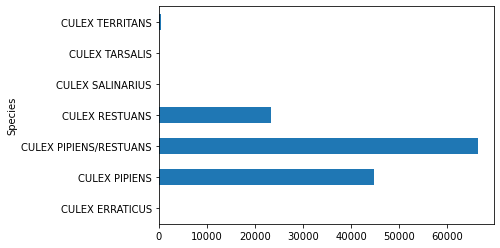

In [15]:
unique_species(train_df,'Species')

In [16]:
unique_species(test_df,'Species')

number of species: 8
['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS', 'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS', 'UNSPECIFIED CULEX', 'CULEX ERRATICUS']


In [17]:
# Finding the proportion of mosquitoes species infected with WNV
def unique_species_wnv(df,col):
    wnv = list(df.groupby('WnvPresent')['Species'].unique()[1])
    for species in wnv:
        wnv_df = df[df[col]==species]
        print(species)
        print(wnv_df['WnvPresent'].value_counts(normalize=True))
        print('------------------------------------------------')
    return

In [18]:
unique_species_wnv(train_df,'Species')

CULEX PIPIENS/RESTUANS
0    0.944865
1    0.055135
Name: WnvPresent, dtype: float64
------------------------------------------------
CULEX PIPIENS
0    0.911078
1    0.088922
Name: WnvPresent, dtype: float64
------------------------------------------------
CULEX RESTUANS
0    0.982117
1    0.017883
Name: WnvPresent, dtype: float64
------------------------------------------------


#### Stacked Bar Graph of Different Species of Mosquitoes Infected with WNV

In [19]:
train_df.groupby('WnvPresent')['Species'].value_counts()[1].rename_axis('Unique Species').reset_index(name='Total WNV Counts')

Unique Species  Total WNV Counts
0  CULEX PIPIENS/RESTUANS               262
1           CULEX PIPIENS               240
2          CULEX RESTUANS                49

In [20]:
species_df = train_df.groupby('Species')['NumMosquitos'].sum().rename_axis('Unique Species').reset_index(name='Total Mosquitoes Counts')
wnv_df = train_df.groupby('WnvPresent')['Species'].value_counts()[1].rename_axis('Unique Species').reset_index(name='Total WNV Counts')
merged_df = pd.merge(species_df, wnv_df, how='left', on='Unique Species').fillna(0)
merged_df['Total Mosquitoes Counts W/O WNV'] = merged_df['Total Mosquitoes Counts'] - merged_df['Total WNV Counts']
merged_df

Unique Species  Total Mosquitoes Counts  Total WNV Counts  \
0         CULEX ERRATICUS                        7               0.0   
1           CULEX PIPIENS                    44671             240.0   
2  CULEX PIPIENS/RESTUANS                    66268             262.0   
3          CULEX RESTUANS                    23431              49.0   
4        CULEX SALINARIUS                      145               0.0   
5          CULEX TARSALIS                        7               0.0   
6         CULEX TERRITANS                      510               0.0   

   Total Mosquitoes Counts W/O WNV  
0                              7.0  
1                          44431.0  
2                          66006.0  
3                          23382.0  
4                            145.0  
5                              7.0  
6                            510.0

<AxesSubplot:title={'center':'Stacked Bar Graph of Different Species of Mosquitoes Infected with WNV'}, xlabel='Unique Species'>

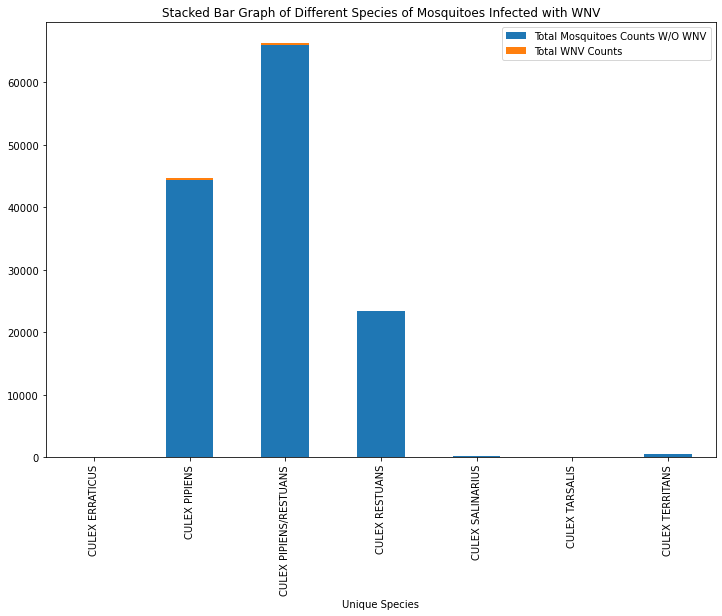

In [21]:
merged_df[['Unique Species','Total Mosquitoes Counts W/O WNV','Total WNV Counts']].plot(x='Unique Species', kind='bar', stacked=True, title='Stacked Bar Graph of Different Species of Mosquitoes Infected with WNV',figsize=(12,8))

Observation: From the stacked chart, it is observed that out of the 7 unique species of mosquitoes in the training dataset, 3 breeds of mosquitoes carry the WNV virus.  Additionally, for the test dataset, there is an additional species of mosquitoes classified as "Unspecified Culex".

#### Identify and Verify Unique Traps and Locations

In [22]:
#Develop a function to identify duplicated locations for each trap, if any
def unique_traps(df):
    df['Coordinates'] = list(zip(df['Latitude'],df['Longitude']))
    df.drop(columns=['Latitude','Longitude'])
    print(f"Unique number of Coordinates: {df['Coordinates'].nunique()}")
    try: 
        print(f"Unique number of Traps: {df['Trap'].nunique()}")
        trap_combination = df[['Trap','Coordinates']].groupby(by='Trap').agg({'Coordinates':pd.Series.nunique})
        print("\nTrap with Multiple Coordinates")
        print(trap_combination.loc[trap_combination['Coordinates'] >1].reset_index())
    except:
        pass

In [23]:
unique_traps(train_df)

Unique number of Coordinates: 138
Unique number of Traps: 136

Trap with Multiple Coordinates
   Trap  Coordinates
0  T009            2
1  T035            2


In [24]:
#Identifying traps with > 1 coordinates in train dataset 
print(train_df[train_df['Trap']=='T009']['Coordinates'].value_counts())
print(train_df[train_df['Trap']=='T035']['Coordinates'].value_counts())

(41.992478, -87.862995)    80
(41.981964, -87.812827)    31
Name: Coordinates, dtype: int64
(41.763733, -87.742302)    45
(41.836644, -87.677737)    27
Name: Coordinates, dtype: int64


In [25]:
unique_traps(test_df)

Unique number of Coordinates: 151
Unique number of Traps: 149

Trap with Multiple Coordinates
   Trap  Coordinates
0  T009            2
1  T035            2


In [26]:
#Identifying traps with > 1 coordinates in test dataset
print(test_df[test_df['Trap']=='T009']['Coordinates'].value_counts())
print(test_df[test_df['Trap']=='T035']['Coordinates'].value_counts())

(41.992478, -87.862995)    768
(41.981964, -87.812827)    760
Name: Coordinates, dtype: int64
(41.763733, -87.742302)    760
(41.836644, -87.677737)    760
Name: Coordinates, dtype: int64


In [27]:
#examine the unique locations in spray_df and add in a new column for coordinates
unique_traps(spray_df)

Unique number of Coordinates: 14294


Observation: 2 Traps (T009 & T035) have 2 coordinates tagged to them. A quick search on google map of the different coordinates for a same trap shows that they are located not too far apart (within 10 miles radius). This implies that traps are not tagged wrongly with multiple coordinates.

#### Examining Distribution of Mosquitoes Caught for Each Trap

In [28]:
mosquitoes_caught_df = train_df.groupby('Trap')['NumMosquitos'].sum().rename_axis('Trap').reset_index(name='Total Mosquitoes Caught').sort_values(by='Total Mosquitoes Caught',ascending=False)
wnv_caught_df = train_df.groupby('WnvPresent')['Trap'].value_counts()[1].rename_axis('Trap').reset_index(name='Total WNV Counts').sort_values(by='Total WNV Counts',ascending=False)
merged_df2 = pd.merge(mosquitoes_caught_df,wnv_caught_df, how='left', on='Trap').fillna(0)
merged_df2['Total Mosquitoes Counts W/O WNV'] = merged_df2['Total Mosquitoes Caught'] - merged_df2['Total WNV Counts']
merged_df2

Trap  Total Mosquitoes Caught  Total WNV Counts  \
0    T115                    21668              41.0   
1    T900                    15386              66.0   
2    T138                     9936              16.0   
3    T002                     3710              18.0   
4    T128                     3315              11.0   
..    ...                      ...               ...   
131  T072                       19               0.0   
132  T237                       18               0.0   
133  T078                       17               0.0   
134  T149                       15               0.0   
135  T040                        6               0.0   

     Total Mosquitoes Counts W/O WNV  
0                            21627.0  
1                            15320.0  
2                             9920.0  
3                             3692.0  
4                             3304.0  
..                               ...  
131                             19.0  
132                             18.0  
133                             17.0  
134                             15.0  
135                              6.0  

[136 rows x 4 columns]

In [31]:
#finding out how many traps did not caught WNV
merged_df2[merged_df2['Total WNV Counts']==0].shape[0]

39

<AxesSubplot:title={'center':'Stacked Bar Graph of Traps on Mosquitoes Count'}, xlabel='Trap'>

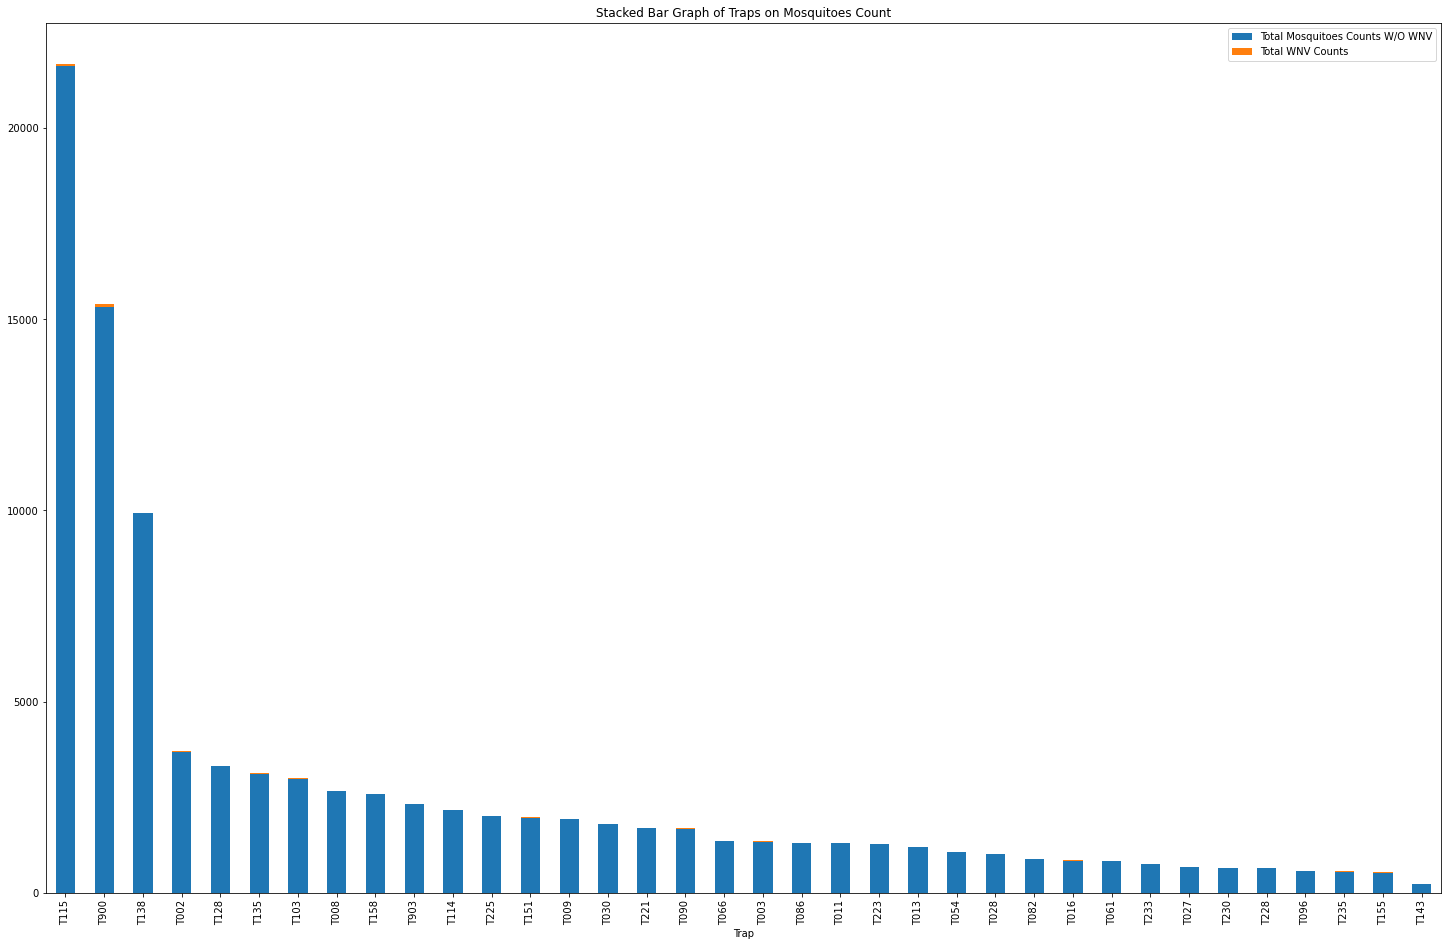

In [32]:
#visualizing stacked barplot for traps with at least 5 WNV counts 
merged_df2[merged_df2['Total WNV Counts']>5][['Trap','Total Mosquitoes Counts W/O WNV','Total WNV Counts']].plot(x='Trap', kind='bar', stacked=True, title='Stacked Bar Graph of Traps on Mosquitoes Count',figsize=(25,16))

In [33]:
#Checking the locations where most mosquitoes/WNV are caught by the traps
print(train_df[train_df['Trap']=='T115'][['Address','Coordinates']].values[0])
print(train_df[train_df['Trap']=='T900'][['Address','Coordinates']].values[0])
print(train_df[train_df['Trap']=='T138'][['Address','Coordinates']].values[0])

['South Doty Avenue, Chicago, IL, USA' (41.673408, -87.599862)]
["ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA"
 (41.974689, -87.890615)]
['South Stony Island Avenue, Chicago, IL, USA' (41.726465, -87.585413)]


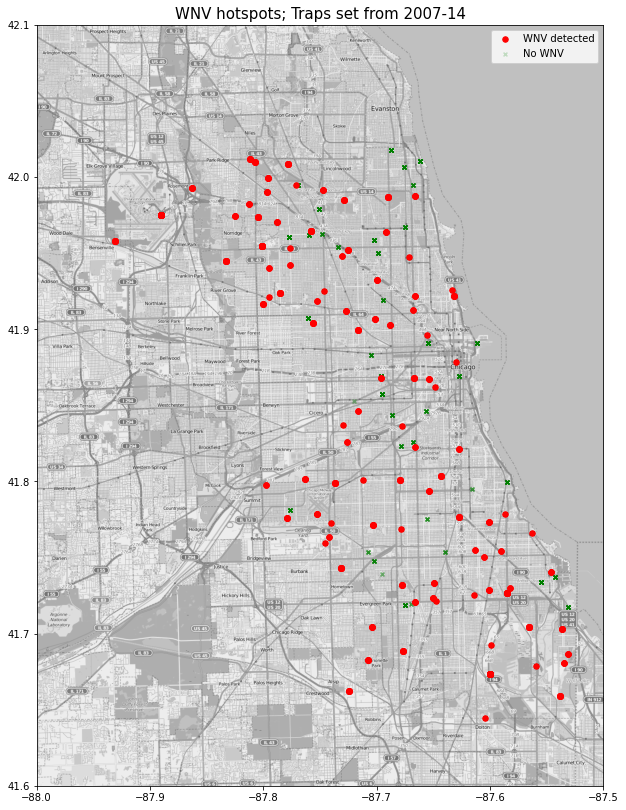

In [34]:
# Overview on the locations of traps, as well as the presence of the WNV
mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


wnv_traps = train_df.loc[train_df["WnvPresent"]==1]
ok_traps = train_df.loc[train_df["WnvPresent"]==0]

wnv_false = plt.scatter(ok_traps['Longitude'], ok_traps['Latitude'], c="green", marker='x', s=15, alpha=0.2)
wnv_true = plt.scatter(wnv_traps['Longitude'], wnv_traps['Latitude'], c="red", marker='o', s=30, alpha=1)

plt.title("WNV hotspots; Traps set from 2007-14", fontsize=15)
plt.legend((wnv_true, wnv_false), ("WNV detected", "No WNV"));

Observation: From the stacked chart, it is observed that 3 traps (T115,T900,T138) have caught the most number of mosquitoes with WNV. Out of the 136 traps, 39 of them also did not have presence of WNV. It is evident that mosquitoes are not spreaded out equally across the cities, and may have some clustering effect from different coordinates.

#### Seasonality

In [35]:
# Breaking down the Date column into years, months, weeks and day will allow us to evaluate whether there is any seasonality in the train dataset.
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['week'] = train_df['Date'].dt.isocalendar().week
train_df['day'] = train_df['Date'].dt.day
train_df['year_month'] = train_df['Date'].dt.strftime("%Y-%m")
train_df.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent              Coordinates  year  month  week  day  \
0             1           0   (41.95469, -87.800991)  2007      5    22   29   
1             1           0   (41.95469, -87.800991)  2007      5    22   29   
2             1           0  (41.994991, -87.769279)  2007      5    22   29   
3             1           0  (41.974089, -87.824812)  2007      5    22   29   
4             4           0  (41.974089, -87.824812)  2007      5    22   29   

  year_month  
0    2007-05  
1    2007-05  
2    2007-05  
3    2007-05  
4    2007-05

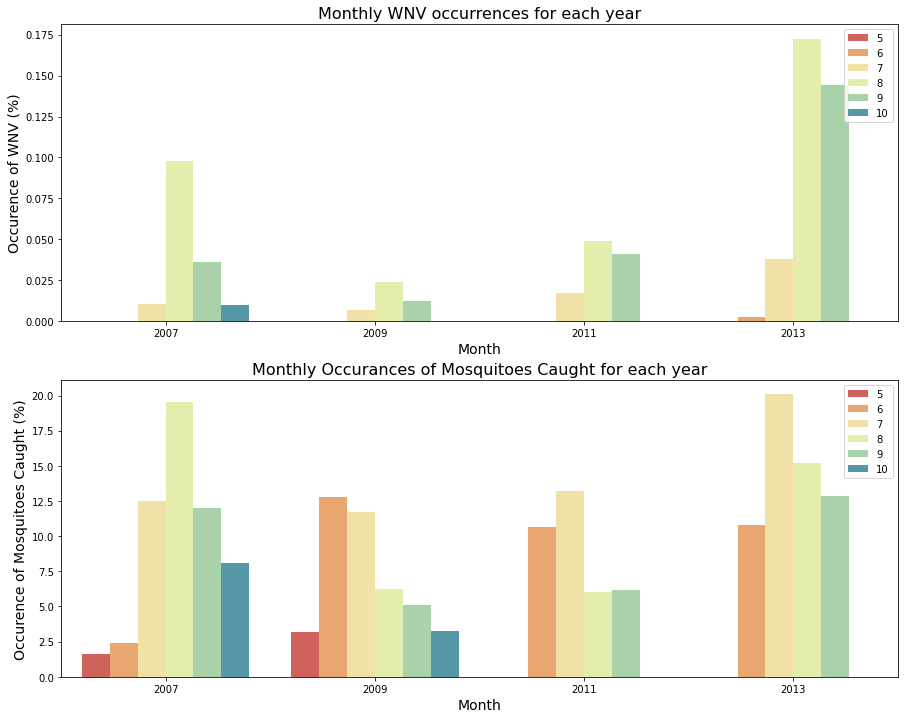

In [109]:
# Visualise occurences of WNV throughout the years
fig, ax = plt.subplots(nrows = 2, figsize=(15,12))

# The monthly WNV occurrence by each year is plotted as a barplot
wnv = train_df[['Date','WnvPresent','year','month','week','NumMosquitos']]
sns.barplot(x = 'year' ,y = 'WnvPresent', data = wnv, hue = 'month', ci = None, 
             palette = 'Spectral', ax = ax[0])
ax[0].legend(fontsize = 14)
ax[0].set_title('Monthly WNV occurrences for each year', fontsize=16)
ax[0].set_xlabel('Month',fontsize=14)
ax[0].set_ylabel('Occurence of WNV (%)',fontsize=14)
ax[0].legend(loc="upper right")

# The monthly occurrence of mosquitoes caught by each year is plotted as a barplot.
sns.barplot(data=wnv, x='year', y='NumMosquitos', hue='month', ci=None, palette = 'Spectral', ax = ax[1])
ax[1].legend(fontsize = 14)
ax[1].set_title('Monthly Occurances of Mosquitoes Caught for each year', fontsize=16)
ax[1].set_ylabel("Occurence of Mosquitoes Caught (%)",fontsize=14)
ax[1].set_xlabel("Month",fontsize=14)
plt.legend(loc="upper right")
plt.show()

In [37]:
#Feature engineering year, month, week and day in test dataset
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['week'] = test_df['Date'].dt.isocalendar().week
test_df['day'] = test_df['Date'].dt.day
test_df['year_month'] = test_df['Date'].dt.strftime("%Y-%m")
test_df.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

              Coordinates  year  month  week  day year_month  
0  (41.95469, -87.800991)  2008      6    24   11    2008-06  
1  (41.95469, -87.800991)  2008      6    24   11    2008-06  
2  (41.95469, -87.800991)  2008      6    24   11    2008-06  
3  (41.95469, -87.800991)  2008      6    24   11    2008-06  
4  (41.95469, -87.800991)  2008      6    24   11    2008-06

Observation: Over the years, there appears to be a seasonality trend, with WNV occurrence increasing over the summer season, peaking in July/August. This makes sense since as the summer heat sets in, mosquito season tends to peak.

#### Clustering

We have chosen to us DBSCAN as our algorithm to find clusers with the following reasons:
 - does not require one to specify the number of clusters in the data
 - ability to find arbitrarily-shaped clusters
 - ability to locate outliers

However, as data scientist, it's equally important to know the limitations of the model:
 - not entirely deterministic
 - curse of dimensionality

 

In [38]:
#Before clustering, reducing the number of rows from original training dataset from 10506 to 8475. 
#We choose to groupby Date/Year/month/week because there may be a seasonality trend, by Trap because we've seen that 
#some areas have more mosquitoes than others, and by Species since we've seen some mosquitoes species have higher chance of carry WNV.

train_cluster = train_df.groupby(['Date','year','month','week','Trap','Species']).agg({'WnvPresent':'sum', 'NumMosquitos':'sum', 'Latitude':'mean','Longitude':'mean', 'AddressAccuracy':'mean'}).rename(columns={'NumMosquitos':'TotalNumMosquitos', 'WnvPresent':'TotalWNV'})

In [39]:
train_cluster.shape

(8475, 5)

In [40]:
#performing manual gridsearch to find the best eps and min_sample parameters, evaluation metric to determine sucess 
#will be both silhouette_score and the number of clusters formed. 

def dbscan(df, columns):
    
    color_map = plt.get_cmap('spring')
    
    df_cluster = df[columns]
    
    df_cluster_scaled = StandardScaler().fit_transform(df_cluster)
                           
    best_silhouette_score = 0
    
    num_of_cluster = 0
    
    multiple = 0 # num_of_cluster * best_silhouette_score
 
    for min_samples in range(4,9):
    
        for eps in list(np.linspace(0,1,20)):

            try:
                dbscan = DBSCAN(eps = eps, min_samples = min_samples)
                dbscan.fit(df_cluster_scaled)
                ss = silhouette_score(df_cluster_scaled, dbscan.labels_)
                df['cluster_trial'] = dbscan.labels_
                vals = df['cluster_trial'].value_counts()
                multiple_1 = ss * len(vals)
                outlier = vals[-1] * 100 / len(df)
                #print(f'Attempting DBScan with EPS value of:{eps}, with silhouette score of {ss}, {vals} number of clusters, and multiple score of {multiple_1}')
                
                #Only consider model with >0.1 of silhouette_score and less than 5% of outliers, otherwise reject
                if (ss >= 0.1) and (outlier <= 5) and (multiple_1 > multiple):

                    best_eps = eps
                    best_min_samples = min_samples
                    multiple = multiple_1
                    best_silhouette_score = silhouette_score(df_cluster_scaled, dbscan.labels_)
                    df['cluster'] = dbscan.labels_
                    num_of_cluster = df['cluster'].value_counts()
                
                else:
                    
                    pass
                        

            except:
                
                pass
  
    print()
    print()
    
    df.drop(columns='cluster_trial', inplace=True)
    print(f'Best EPS: {best_eps}')
    print(f'Best Min_Samples: {best_min_samples}')
    print(f'Best Silhouette Score: {best_silhouette_score}')
    print(f'Number of outliers: {num_of_cluster[-1]} ({num_of_cluster[-1] * 100 / len(df):.2f}% of samples)')
    print(f'Number of clusters: {len(num_of_cluster)}')

    fig = plt.figure(figsize = (16, 10))
    ax = plt.axes(projection = '3d')
    ax.scatter3D(df['Latitude'], df['Longitude'], df['TotalNumMosquitos'], c = df['cluster'], cmap = color_map)
    ax.set_title(f'DBSCAN for {columns}')
    plt.show()



Best EPS: 0.21052631578947367
Best Min_Samples: 4
Best Silhouette Score: 0.5468666094037001
Number of outliers: 401 (4.73% of samples)
Number of clusters: 129


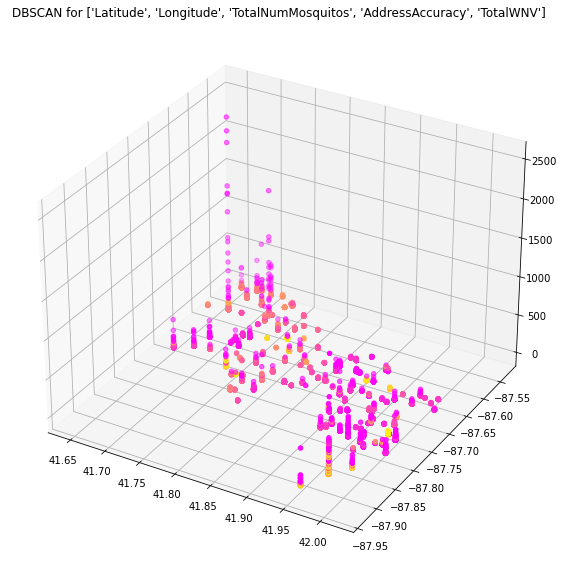

In [41]:
dbscan(train_cluster, ['Latitude','Longitude','TotalNumMosquitos','AddressAccuracy', 'TotalWNV'])

Observation: Based on Coordinates, Total Mosquito Count, TotalWNV, and AddressAccuracy, we constructed 129 clusters using DBSCAN to fit the entire training dataset. We will now attempt to predict the clusters in our test dataset using KNN supervised modeling with Latitude, Longtitude, and AddressAccuracy.

In [42]:
#grid search for best params with KNN model
def grid_search_knn(df_train, X_train,y_train): 
    
    pipe_model = Pipeline([
                        ('ss',StandardScaler()),
                        ('knn', KNeighborsClassifier())
                      ])
    param_dic = {
        'knn__n_neighbors': range(1, 31, 2), #make sure knn_n_neighbours are odd number
        'knn__metric': ['euclidean', 'manhattan','minkowski']
    }
    
    knn_gridsearch = GridSearchCV(pipe_model, param_grid=param_dic, cv=5, verbose=1)
    knn_gridsearch.fit(X_train, y_train)

    #Evaluate
    best_params = knn_gridsearch.best_params_
    train_score = knn_gridsearch.best_score_
    print(f'Best Params: {best_params}')
    print(f'Best Train score: {train_score}')
    
    # after performing gridsearch, best params {'knn__metric': 'euclidean', 'knn__n_neighbors': 13}
    gs_df = pd.DataFrame(knn_gridsearch.cv_results_)
    gs_df = gs_df[gs_df['param_knn__metric'] == 'euclidean']
    gs_df.plot(x='param_knn__n_neighbors', y='mean_test_score', figsize = (16, 10));
   
    return

In [43]:
train_cluster = train_cluster.reset_index()

In [44]:
#We will solely use coordinates, and address accuracy for our KNN Modeling because test dataset has additional traps and coordinates.

test_cluster = test_df[['Date', 'year', 'month', 'week', 'Trap', 'Species' , 'Latitude', 'Longitude','AddressAccuracy']]

In [45]:
X_train = train_cluster.drop(columns=['Date', 'cluster','TotalNumMosquitos','TotalWNV','Trap','Species','year', 'month', 'week'])
y_train = train_cluster['cluster']
X_test = test_cluster.drop(columns=['Date','year', 'month', 'week', 'Trap', 'Species'])

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 11}
Best Train score: 0.9236578171091445


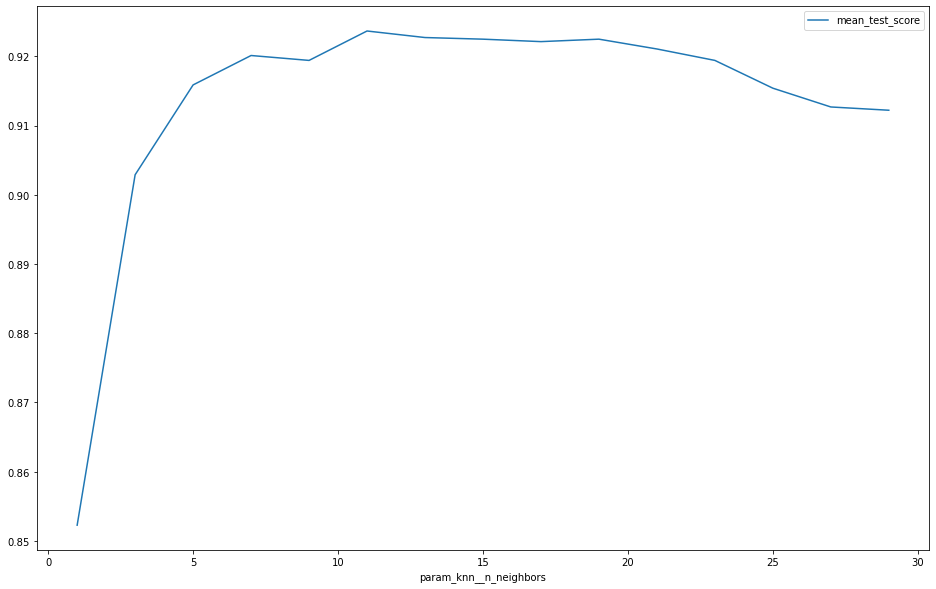

In [46]:
grid_search_knn(train_cluster,X_train,y_train)

In [47]:
#instantiate knn and ss with best params
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11)
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

knn.fit(X_train_scaled,y_train)
knn.score(X_train_scaled,y_train)
X_test['cluster'] = knn.predict(X_test_scaled)

In [48]:
#Test datasets are group to 90 clusters according to longitude and latitude parameters
X_test.cluster.nunique()

90

In [49]:
test_cluster['cluster'] = X_test['cluster']

#### Get dummies for different species of mosquitoes

In [50]:
#Combine UNSPECIFIC CULEX with the CULEX ERRATICUS for test datasets since WNV virus is more likely to exist in certain species of mosquitoes. 
merged_df

Unique Species  Total Mosquitoes Counts  Total WNV Counts  \
0         CULEX ERRATICUS                        7               0.0   
1           CULEX PIPIENS                    44671             240.0   
2  CULEX PIPIENS/RESTUANS                    66268             262.0   
3          CULEX RESTUANS                    23431              49.0   
4        CULEX SALINARIUS                      145               0.0   
5          CULEX TARSALIS                        7               0.0   
6         CULEX TERRITANS                      510               0.0   

   Total Mosquitoes Counts W/O WNV  
0                              7.0  
1                          44431.0  
2                          66006.0  
3                          23382.0  
4                            145.0  
5                              7.0  
6                            510.0

In [51]:
#Combine UNSPECIFIC CULEX with the CULEX ERRATICUS and rename as OTHERS
test_cluster.loc[(test_cluster['Species']=='CULEX ERRATICUS') | (test_cluster['Species']=='UNSPECIFIED CULEX'), 'Species' ] = 'Others'

In [52]:
test_cluster.Species.nunique()

7

In [53]:
#Rename CULEX ERRATICUS as OTHERS in our train dataset to ensure consistency with test dataset
train_cluster.loc[(train_cluster['Species']=='CULEX ERRATICUS'),'Species'] = 'Others'

In [54]:
train_cluster.Species.nunique()

7

In [55]:
#get_dummies for nominal values
train_cluster = pd.get_dummies(data=train_cluster, columns=['Species'],drop_first=True)
test_cluster = pd.get_dummies(data=test_cluster, columns=['Species'],drop_first=True)

In [56]:
#get_dummies for clustering data
train_cluster = pd.get_dummies(data=train_cluster, columns=['cluster'],drop_first=True)
test_cluster = pd.get_dummies(data=test_cluster, columns=['cluster'],drop_first=True)

In [57]:
#difference of columns between training and testing datasets
#train_cluster.columns.difference(test_cluster.columns)

difference_ls = ['cluster_101', 'cluster_106',
       'cluster_109', 'cluster_110', 'cluster_111', 'cluster_112',
       'cluster_116', 'cluster_117', 'cluster_120', 'cluster_121',
       'cluster_122', 'cluster_123', 'cluster_124', 'cluster_125',
       'cluster_126', 'cluster_127', 'cluster_67', 'cluster_69', 'cluster_77',
       'cluster_79', 'cluster_80', 'cluster_81', 'cluster_82', 'cluster_83',
       'cluster_84', 'cluster_85', 'cluster_86', 'cluster_87', 'cluster_88',
       'cluster_89', 'cluster_90', 'cluster_91', 'cluster_92', 'cluster_93',
       'cluster_94', 'cluster_95', 'cluster_96', 'cluster_97', 'cluster_98']

In [58]:
#fill in 0 for for these missing columns in test dataset
test_cluster[difference_ls] = 0

In [59]:
train_cluster.columns.difference(test_cluster.columns)

Index(['TotalNumMosquitos', 'TotalWNV'], dtype='object')

In [60]:
print(train_cluster.shape)
print(test_cluster.shape)

(8475, 144)
(116293, 142)


#### Weather Dataset

In [61]:
# Breaking down the Date column into weeks will allow us to evaluate whether there is any seasonality in the train dataset.
weather_df['week'] = weather_df['Date'].dt.isocalendar().week
weather_df.head()

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68      M        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52      M        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

   ... Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel ResultSpeed  \
0  ...     0      M      0.0        0.00       29.10    29.82         1.7   
1  ...     M      M        M        0.00       29.18    29.82         2.7   
2  ...     0      M      0.0        0.00       29.38    30.09        13.0   
3  ...     M      M        M        0.00       29.44    30.08        13.3   
4  ...     0      M      0.0        0.00       29.39    30.12        11.7   

  ResultDir AvgSpeed  week  
0        27      9.2    18  
1        25      9.6    18  
2         4     13.4    18  
3         2     13.4    18  
4         7     11.9    18  

[5 rows x 23 columns]

In [62]:
#weather parameters we are interested in
ls = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
       'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed']

In [63]:
#Before on deciding how to fill NAs (Represented by either 'T' or 'M'), let's plot the distribution for each column that we are interested in
def plot_distribution(df, columns):
    
    for column in columns:
        
        count = df.loc[(df[column] == 'M') | (df[column] == 'T') | (df[column] == '  T'), column].count() / len(df[column])
        print(f'{column} has {count:.4f}% of invalid inputs')
        
        sns.distplot(df.loc[(df[column] != 'M') & (df[column] != 'T') & (df[column] != '  T'), column].map(lambda x : float(x)))
        plt.show()
        
    return

Tmax has 0.0000% of invalid inputs


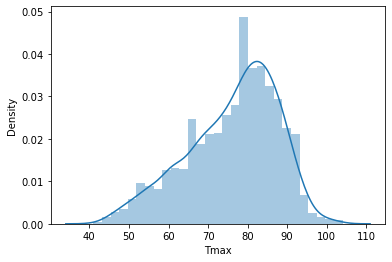

Tmin has 0.0000% of invalid inputs


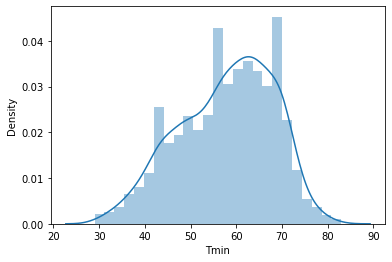

Tavg has 0.0037% of invalid inputs


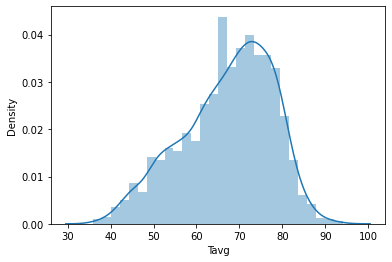

DewPoint has 0.0000% of invalid inputs


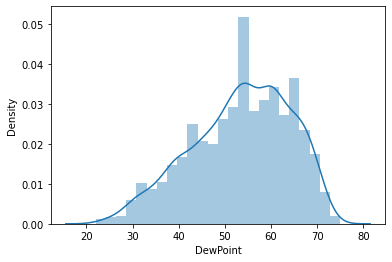

WetBulb has 0.0014% of invalid inputs


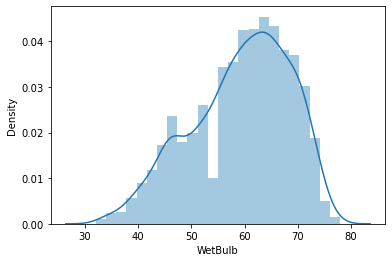

Heat has 0.0037% of invalid inputs


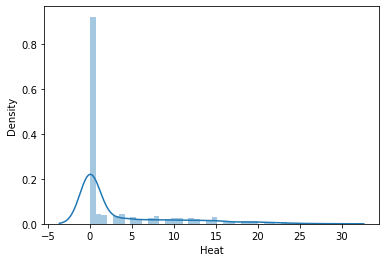

Cool has 0.0037% of invalid inputs


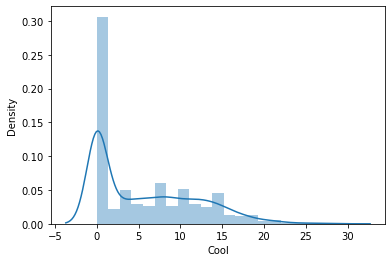

PrecipTotal has 0.1087% of invalid inputs


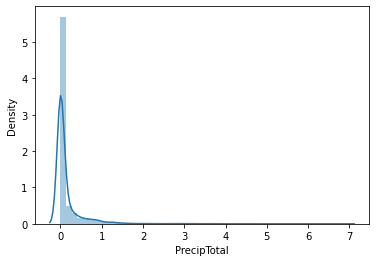

StnPressure has 0.0014% of invalid inputs


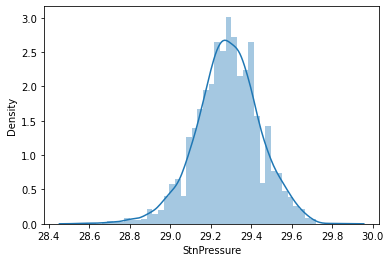

SeaLevel has 0.0031% of invalid inputs


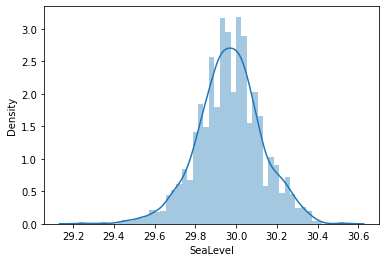

ResultSpeed has 0.0000% of invalid inputs


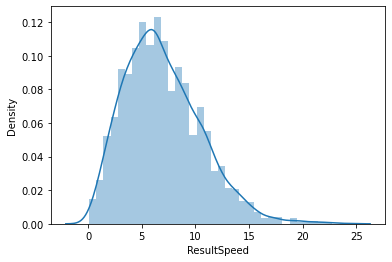

ResultDir has 0.0000% of invalid inputs


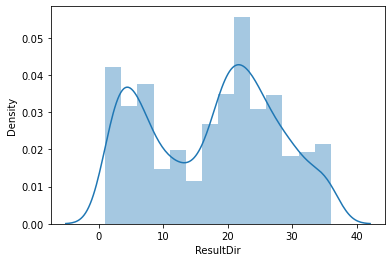

AvgSpeed has 0.0010% of invalid inputs


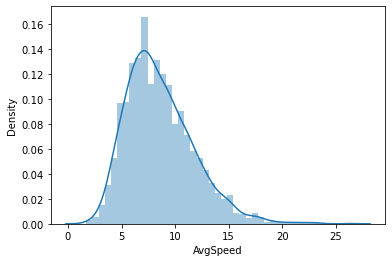

In [64]:
plot_distribution(weather_df,ls)

Observation: All of the weather parameters we're interested in have a null value of less than ~0.1 percent. The mean values will be used to fill in the 'Tavg', 'WetBulb', 'StnPressure', 'SeaLevel', 'AvgSpeed', 'Heat,' 'Cool,' and 'PrecipTotal' Null Values.


In [65]:
def resolve_null_values(df,columns):

    for column in columns:
        
        df.loc[(df[column] == 'M') | (df[column] == 'T') | (df[column] == '  T'), column] = np.nan
        imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
        imputer = imputer.fit(df[[column]])
        df[column] = imputer.transform(df[[column]])
        
        count = df.loc[(df[column] == 'M') | (df[column] == 'T') | (df[column] == '  T'), column].count() 
        print(f'{column} has {count} of invalid inputs')
        
    return

In [66]:
resolve_null_values(weather_df,ls)

Tmax has 0 of invalid inputs
Tmin has 0 of invalid inputs
Tavg has 0 of invalid inputs
DewPoint has 0 of invalid inputs
WetBulb has 0 of invalid inputs
Heat has 0 of invalid inputs
Cool has 0 of invalid inputs
PrecipTotal has 0 of invalid inputs
StnPressure has 0 of invalid inputs
SeaLevel has 0 of invalid inputs
ResultSpeed has 0 of invalid inputs
ResultDir has 0 of invalid inputs
AvgSpeed has 0 of invalid inputs


In [67]:
#drop unnecessary weather features
weather_df_cleaned = weather_df.drop(columns=['Depart', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall'])

#### Feature engineering Relative Humidity and Temperature Range
Formula to describe relation between dew point, air temperature, and relative humidity: https://www.omnicalculator.com/physics/relative-humidity

In [68]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'week'],
      dtype='object')

In [69]:
#improving Tavg accuracy by taking mean of Tmax and Tmin on that particular day
weather_df_cleaned['Tavg'] = ((weather_df_cleaned['Tmax'] + weather_df_cleaned['Tmin'])/2 )

In [70]:
#feature engineering R.H
weather_df_cleaned['RH'] = 100*(np.exp((17.67 * ((weather_df_cleaned['DewPoint'] - 32) * (5/9))) / 
                                           (243.5 + ((weather_df_cleaned['DewPoint'] - 32) * (5/9)))) 
                                    /
                                    np.exp((17.67 * ((weather_df_cleaned['Tavg'] - 32) * (5/9))) /
                                           (243.5 + ((weather_df_cleaned['Tavg'] - 32) * (5/9)))))

In [71]:
#feature engineering temperature range
weather_df_cleaned['Trange'] = weather_df_cleaned['Tmax'] - weather_df_cleaned['Tmin'] 

In [72]:
weather_df_cleaned.head()

Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  \
0        1 2007-05-01  83.0  50.0  66.5      51.0     56.0   0.0   2.0   
1        2 2007-05-01  84.0  52.0  68.0      51.0     57.0   0.0   3.0   
2        1 2007-05-02  59.0  42.0  50.5      42.0     47.0  14.0   0.0   
3        2 2007-05-02  60.0  43.0  51.5      42.0     47.0  13.0   0.0   
4        1 2007-05-03  66.0  46.0  56.0      40.0     48.0   9.0   0.0   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  week  \
0          0.0        29.10     29.82          1.7       27.0       9.2    18   
1          0.0        29.18     29.82          2.7       25.0       9.6    18   
2          0.0        29.38     30.09         13.0        4.0      13.4    18   
3          0.0        29.44     30.08         13.3        2.0      13.4    18   
4          0.0        29.39     30.12         11.7        7.0      11.9    18   

          RH  Trange  
0  57.394895    33.0  
1  54.497276    32.0  
2  72.508686    17.0  
3  69.872482    17.0  
4  54.848860    20.0

#### Checking for colinearity between parameters in weather dataset

In [73]:
corr_df = pd.DataFrame((weather_df_cleaned).corr().abs().unstack().sort_values(ascending=False),columns=['corr'])
corr_df = corr_df[corr_df['corr'] != 1].iloc[::2]
corr_df[corr_df['corr']>0.9]

corr
WetBulb     DewPoint  0.972206
Tavg        Tmax      0.967861
StnPressure SeaLevel  0.967305
WetBulb     Tavg      0.960725
Tmin        Tavg      0.960682
WetBulb     Tmin      0.951033
ResultSpeed AvgSpeed  0.909701
Tmax        WetBulb   0.904413
DewPoint    Tmin      0.904358

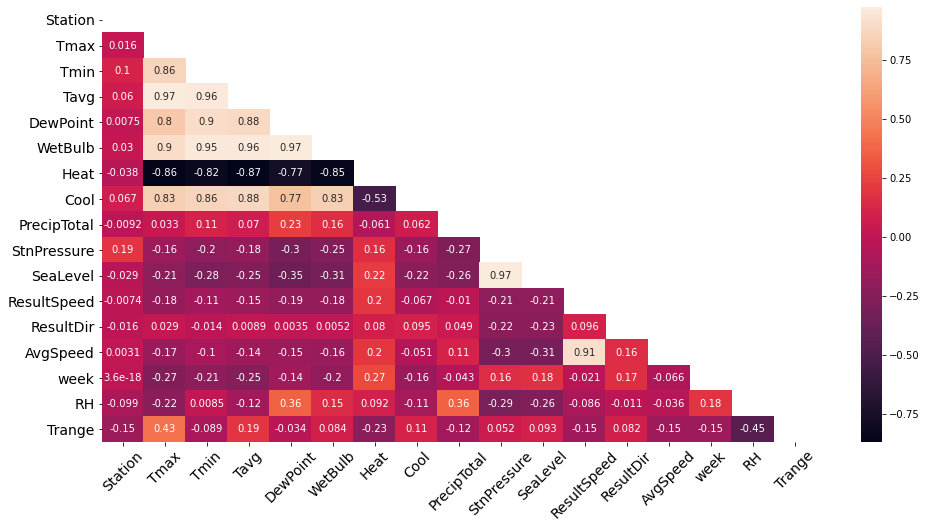

In [74]:
# Generate a mask for the upper triangle (taken from Seaborn example gallery).
mask = np.zeros_like(weather_df_cleaned.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True         # triu: TRIangle upper.

fig, ax = plt.subplots(figsize=(16,8))

# Plot the heat map with Seaborn.
# Assign the Matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(weather_df_cleaned.corr(), mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents useless printouts from Matplotlib.
plt.show()

Observation: We can detect a lot of collinearity between the different weather parameters from the heatmap. Before dropping, we'll combine the weather data with our training/test dataset to see which features are most relevant in forecasting WNV.

#### Merging Dataframes

Our weather stations are located in the following coordinates:
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

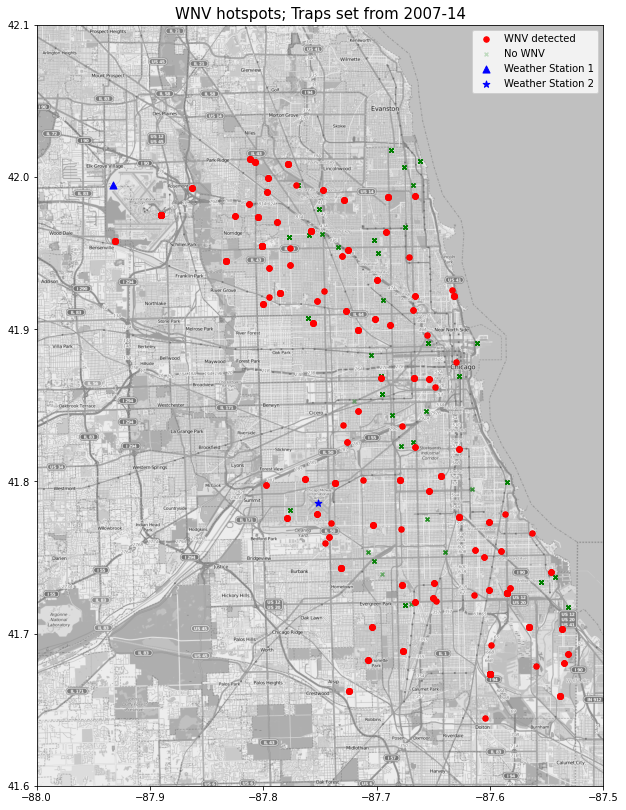

In [75]:
# Plotting the weather stations in map
mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


wnv_traps = train_df.loc[train_df["WnvPresent"]==1]
ok_traps = train_df.loc[train_df["WnvPresent"]==0]

wnv_false = plt.scatter(ok_traps['Longitude'], ok_traps['Latitude'], c="green", marker='x', s=15, alpha=0.2)
wnv_true = plt.scatter(wnv_traps['Longitude'], wnv_traps['Latitude'], c="red", marker='o', s=30, alpha=1)
weather_station1 = plt.scatter(-87.933,41.995, c="Blue", marker='^', s=50, alpha=1)
weather_station2 = plt.scatter(-87.752,41.786, c="Blue", marker='*', s=50, alpha=1)

plt.title("WNV hotspots; Traps set from 2007-14", fontsize=15)
plt.legend((wnv_true, wnv_false, weather_station1, weather_station2), ("WNV detected", "No WNV", "Weather Station 1", "Weather Station 2"));

In [76]:
# plot weekly temperature to check for significant difference between stations
def plot_stations_weekly_weather(df,columns):
   
    for column in columns:
        
        plt.figure(figsize=(18,8))
        sns.lineplot(x = 'week',y = column, data = df[df['Station']==1], ci = None, label = "Station 1")
        sns.lineplot(x = 'week',y = column, data = df[df['Station']==2], ci = None, label = "Station 2")
        plt.title(f'{column} at each meteorological station on a weekly basis')
        plt.xlabel('week')
        plt.ylabel(f'{column}')
        plt.show()
    
    return

In [77]:
ls = ['Tmax','Tmin','Tavg','DewPoint','WetBulb','Heat','Cool','PrecipTotal','StnPressure','SeaLevel','ResultSpeed','ResultDir','AvgSpeed','RH','Trange']

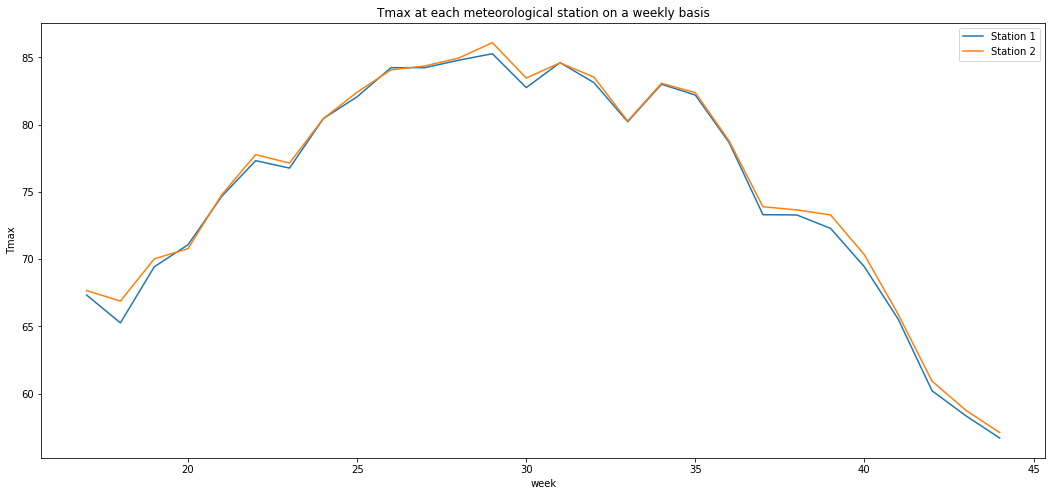

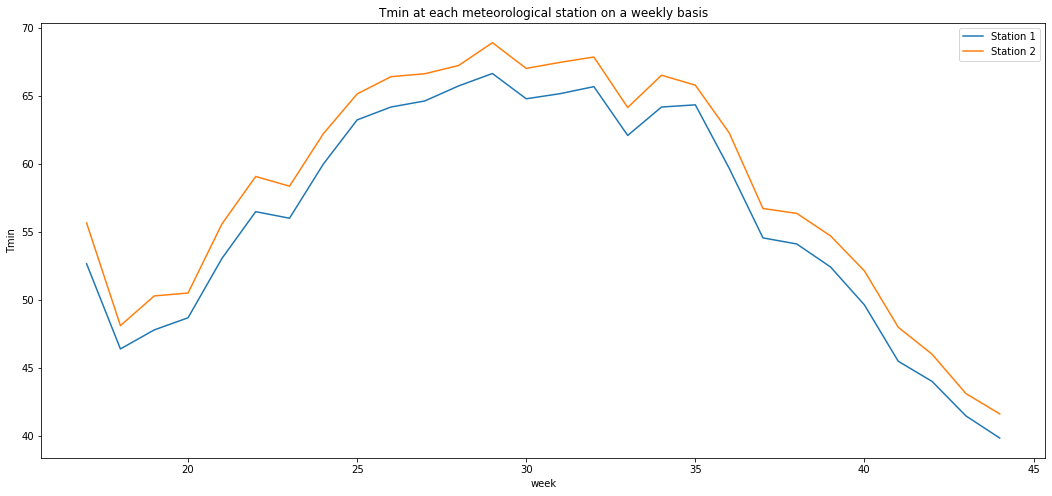

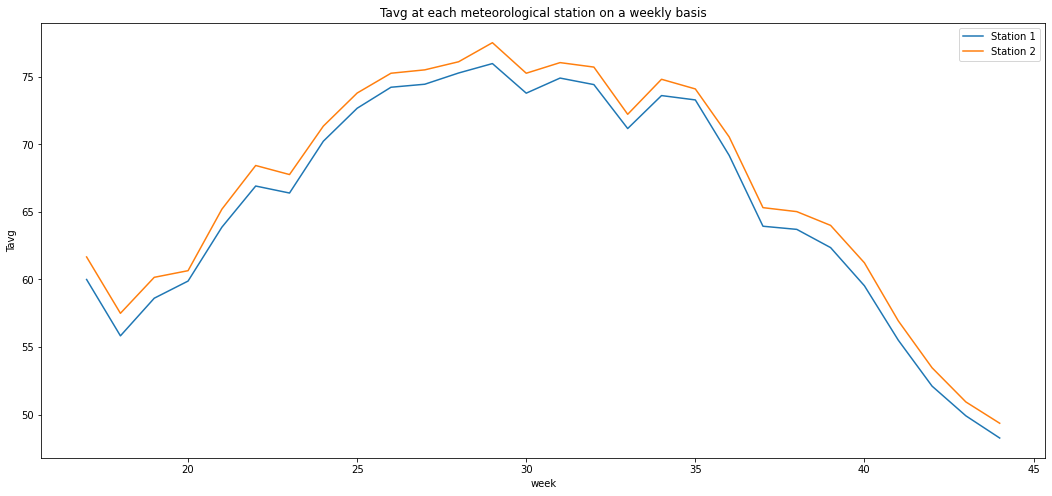

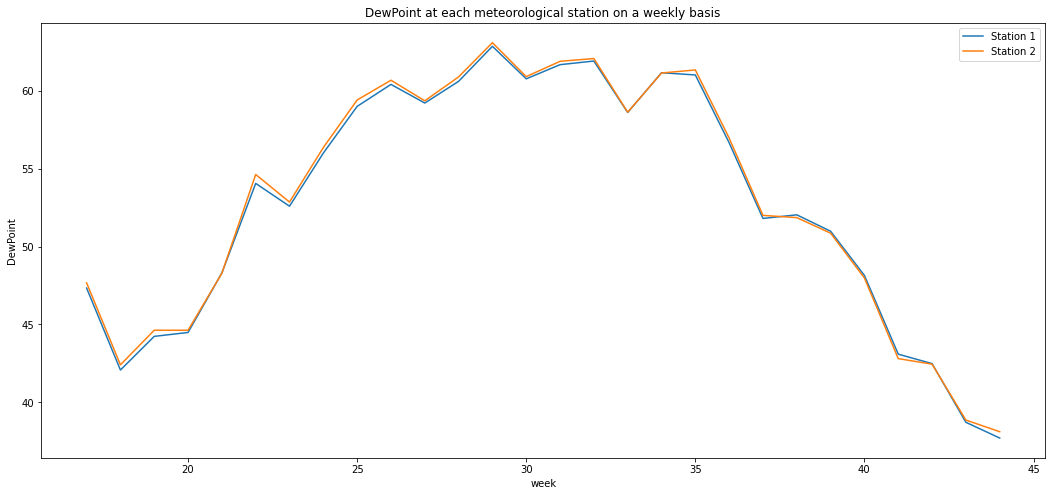

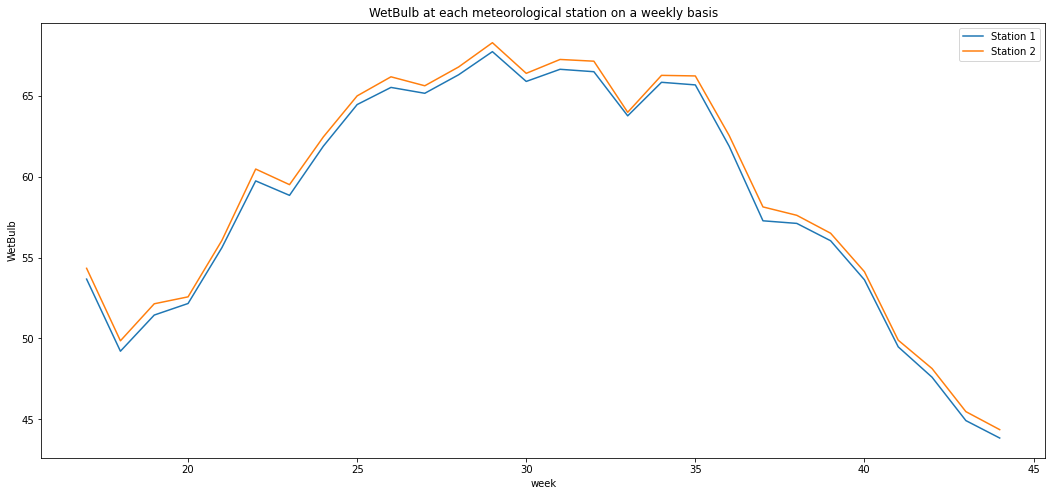

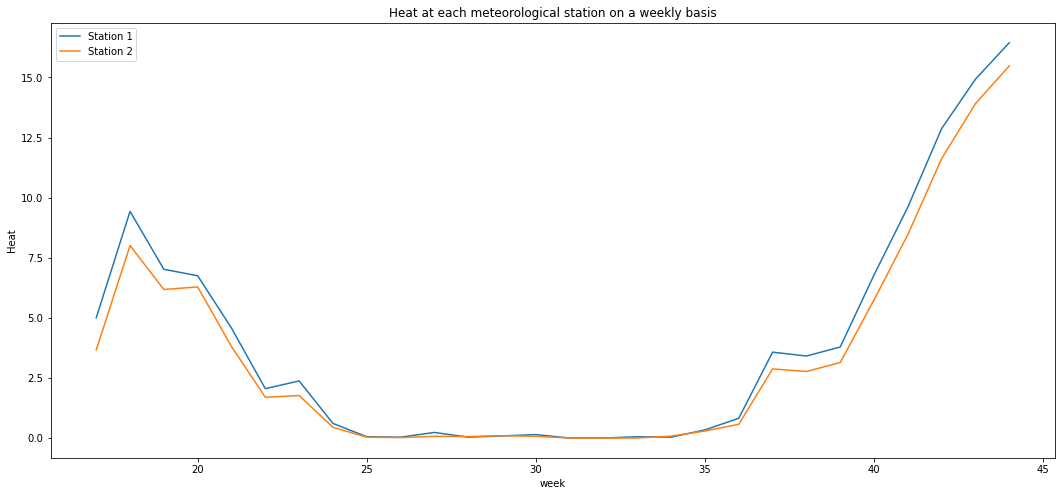

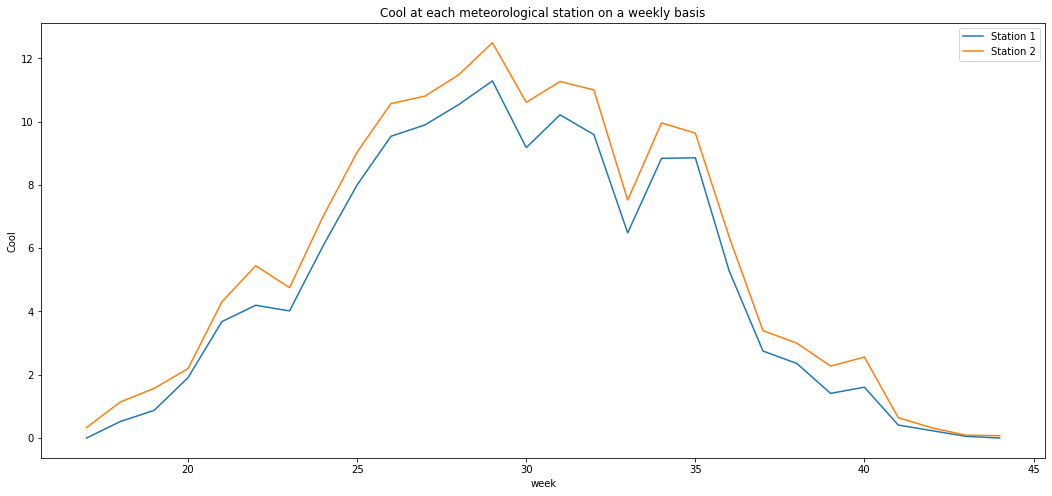

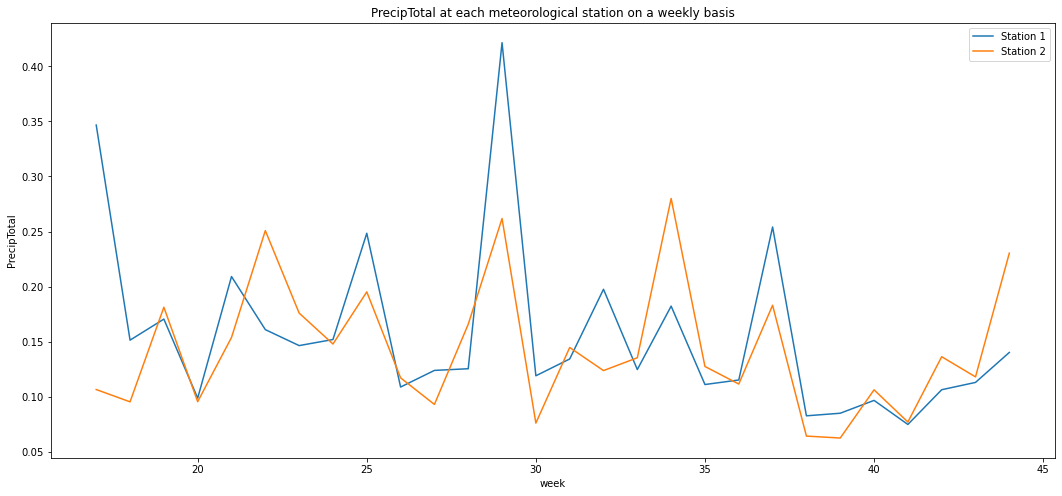

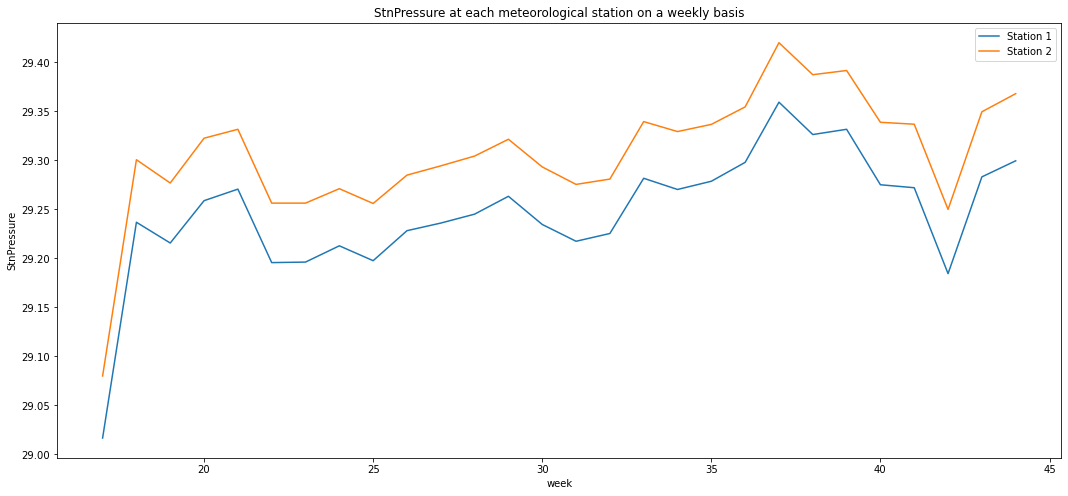

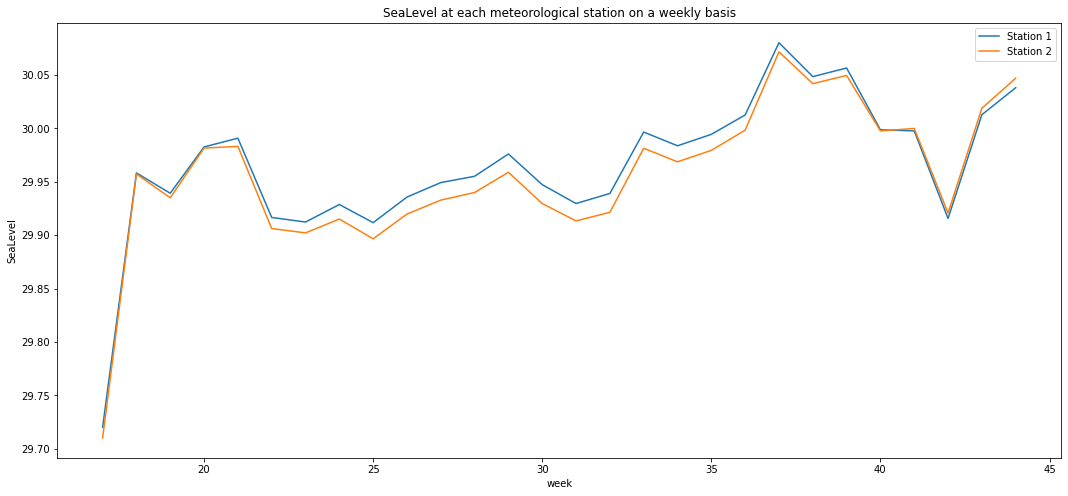

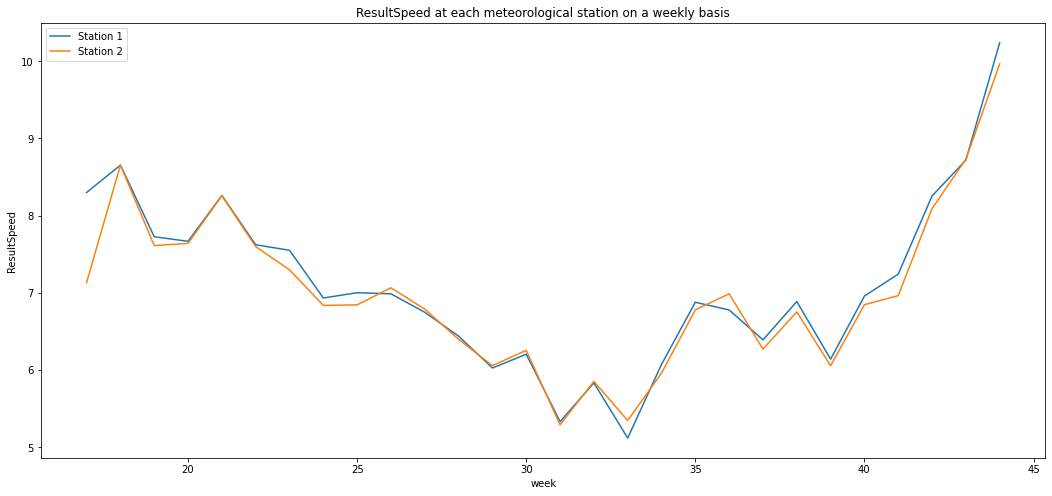

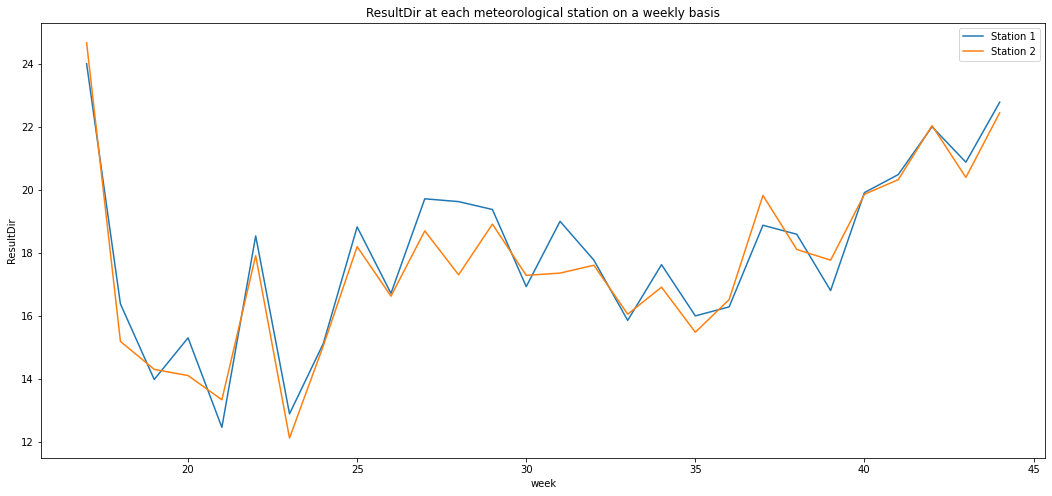

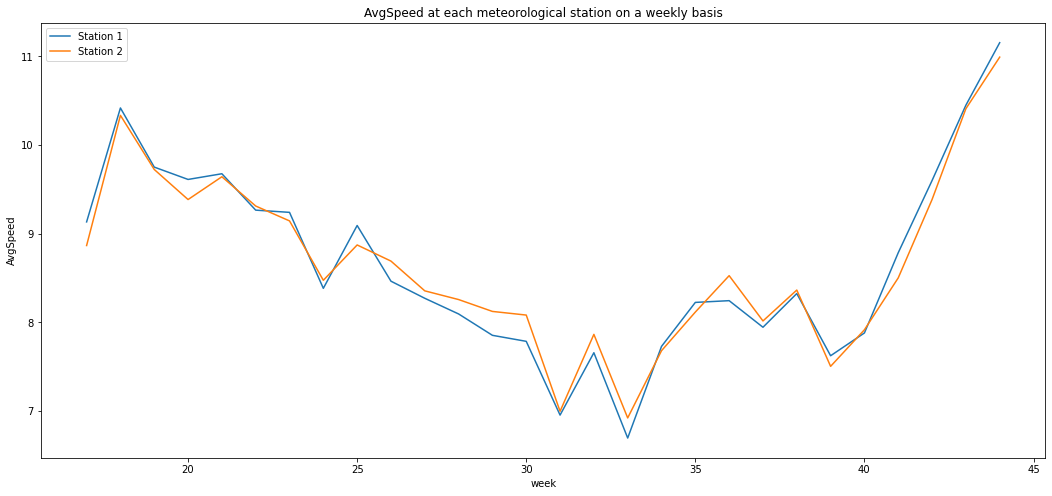

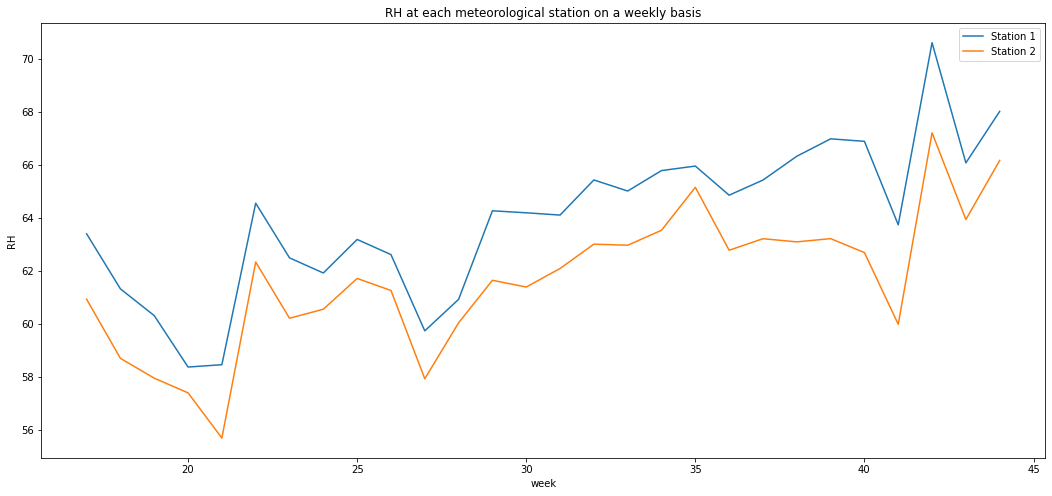

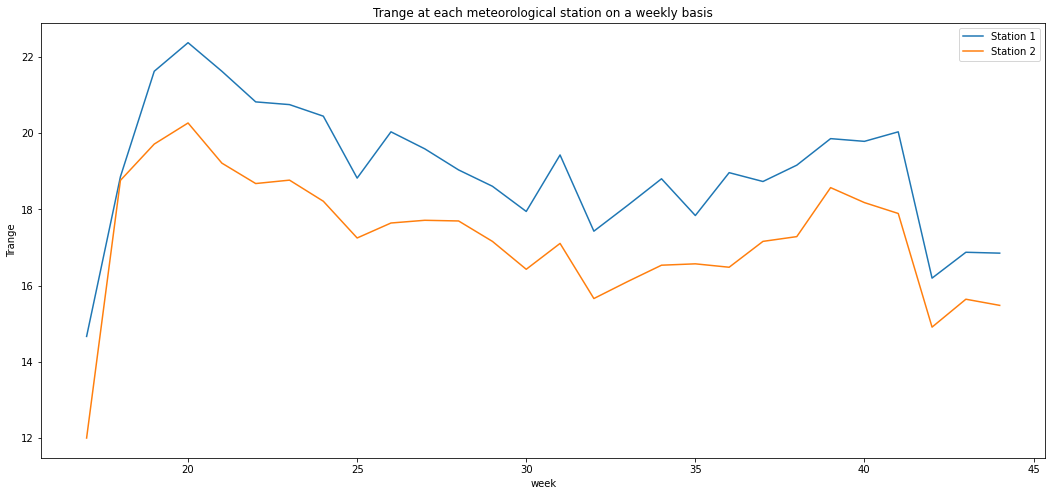

In [78]:
plot_stations_weekly_weather(weather_df_cleaned, ls)

In [79]:
print("Weather Station 1")
print(weather_df_cleaned[weather_df_cleaned['Station']==1].describe()[['Tavg','RH','PrecipTotal']])
print()
print("Weather Station 2")
print(weather_df_cleaned[weather_df_cleaned['Station']==2].describe()[['Tavg','RH','PrecipTotal']])

Weather Station 1
              Tavg           RH  PrecipTotal
count  1472.000000  1472.000000  1472.000000
mean     66.354959    63.929792     0.150843
std      10.514591    11.388378     0.418381
min      35.500000    32.078533     0.000000
25%      59.500000    55.836989     0.000000
50%      68.000000    63.626674     0.000000
75%      74.500000    71.164630     0.147245
max      92.500000   103.698371     6.860000

Weather Station 2
              Tavg           RH  PrecipTotal
count  1472.000000  1472.000000  1472.000000
mean     67.621603    61.642220     0.143646
std      10.518193    11.504066     0.360636
min      36.000000    29.963615     0.000000
25%      60.500000    53.489223     0.000000
50%      69.500000    60.863101     0.000000
75%      76.000000    69.088638     0.147245
max      93.500000   107.159263     4.730000


Observation: Station 1 is wetter, colder, and has a greater Relative Humidity than Station 2. Because the weather at these two stations differs, we'll assign the trap locations for the train and test datasets to the nearest weather station.

In [80]:
#Creating a function that calculates the vincenty distance between each trap position and the two weather stations 
#and assigns it to the station that is closest to it.
def assign_weather_station(df):
    weather_station_1 = (41.995, -87.933)
    weather_station_2 = (41.786, -87.752)

    ls = []

    for i in range(len(df)): 
        
        coords = (df['Latitude'][i], df['Longitude'][i])
        distance_from_1 = geopy.distance.distance(coords, weather_station_1)
        distance_from_2 = geopy.distance.distance(coords, weather_station_2)

        if distance_from_1 < distance_from_2:

            ls.append(1)

        else:

            ls.append(2)
        
    return ls

In [81]:
train_cluster['Station'] = assign_weather_station(train_cluster)
test_cluster['Station'] = assign_weather_station(test_cluster)

In [82]:
print(train_cluster.Station.value_counts(normalize=True))
print()
print(test_cluster.Station.value_counts(normalize=True))

2    0.709381
1    0.290619
Name: Station, dtype: float64

2    0.695588
1    0.304412
Name: Station, dtype: float64


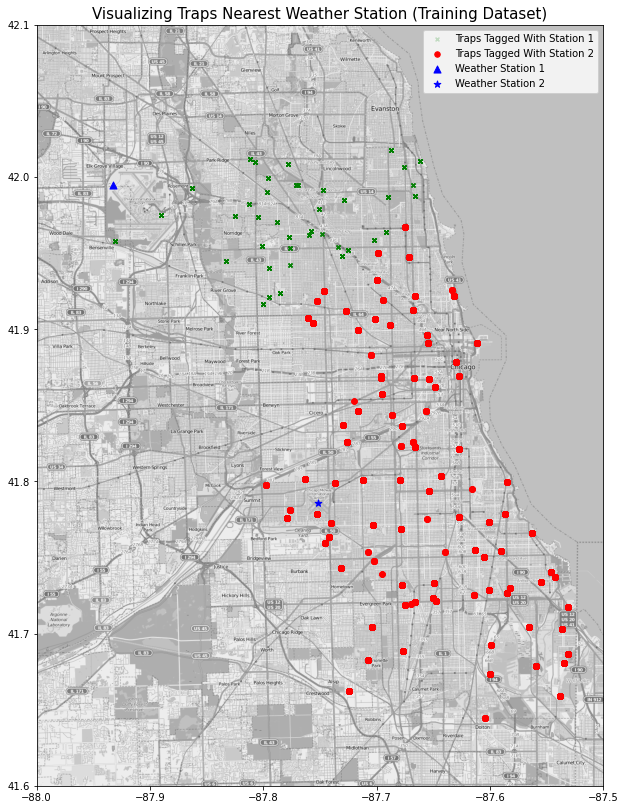

In [83]:
# Visualizing nearest weather station to each trap for training dataset

mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


station_1 = train_cluster.loc[train_cluster["Station"]==1]
station_2 = train_cluster.loc[train_cluster["Station"]==2]

station_1_plot = plt.scatter(station_1['Longitude'], station_1['Latitude'], c="green", marker='x', s=15, alpha=0.2)
station_2_plot = plt.scatter(station_2['Longitude'], station_2['Latitude'], c="red", marker='o', s=30, alpha=1)
weather_station1 = plt.scatter(-87.933,41.995, c="Blue", marker='^', s=50, alpha=1)
weather_station2 = plt.scatter(-87.752,41.786, c="Blue", marker='*', s=50, alpha=1)

plt.title("Visualizing Traps Nearest Weather Station (Training Dataset)", fontsize=15)
plt.legend((station_1_plot, station_2_plot, weather_station1, weather_station2), ("Traps Tagged With Station 1", "Traps Tagged With Station 2", "Weather Station 1", "Weather Station 2"));

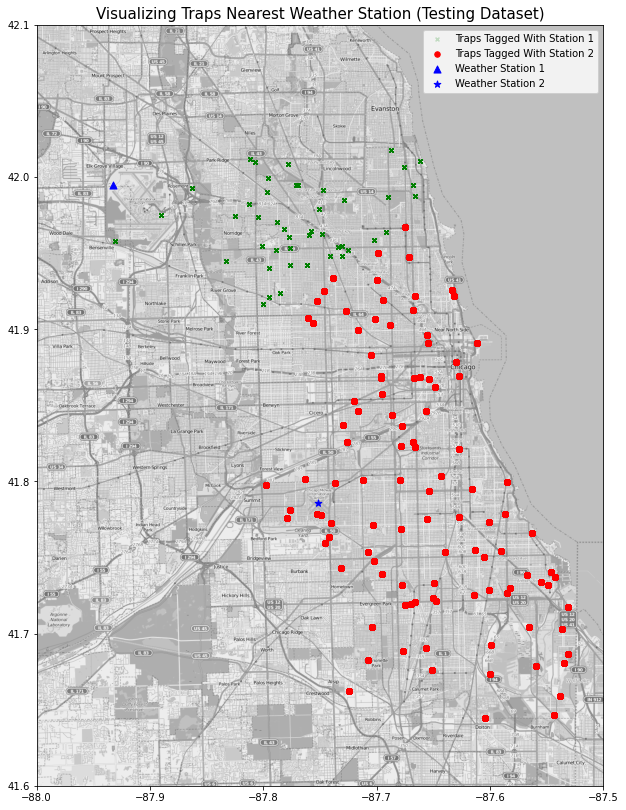

In [84]:
# Visualizing nearest weather station to each trap for testing dataset

mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


station_1 = test_cluster.loc[test_cluster["Station"]==1]
station_2 = test_cluster.loc[test_cluster["Station"]==2]

station_1_plot = plt.scatter(station_1['Longitude'], station_1['Latitude'], c="green", marker='x', s=15, alpha=0.2)
station_2_plot = plt.scatter(station_2['Longitude'], station_2['Latitude'], c="red", marker='o', s=30, alpha=1)
weather_station1 = plt.scatter(-87.933,41.995, c="Blue", marker='^', s=50, alpha=1)
weather_station2 = plt.scatter(-87.752,41.786, c="Blue", marker='*', s=50, alpha=1)

plt.title("Visualizing Traps Nearest Weather Station (Testing Dataset)", fontsize=15)
plt.legend((station_1_plot, station_2_plot, weather_station1, weather_station2), ("Traps Tagged With Station 1", "Traps Tagged With Station 2", "Weather Station 1", "Weather Station 2"));

Observation: Vincenty's equations are two related iterative geodesic procedures invented by Thaddeus Vincenty to compute the distance between two points on the surface of a spheroid. They are more accurate than methods that presume a spherical Earth, such as great-circle distance, because they are based on the assumption that the figure of the Earth is an oblate spheroid.

In [85]:
#now we are ready to merge training dataframe based on dates and station number allocated
combined_train_df = pd.merge(train_cluster, weather_df_cleaned, on=("Date","Station"))
combined_test_df = pd.merge(test_cluster, weather_df_cleaned, on=("Date","Station"))

In [86]:
#checking for colinearity on the combined dataset
combined_corr_df = pd.DataFrame((combined_train_df).corr().abs().unstack().sort_values(ascending=False),columns=['corr'])
combined_corr_df = combined_corr_df[combined_corr_df['corr'] != 1].iloc[::2]
combined_corr_df[combined_corr_df['corr']>0.9]

corr
DewPoint    WetBulb   0.969576
week_y      month     0.966411
week_x      month     0.966411
StnPressure SeaLevel  0.955300
Tavg        Tmax      0.950250
            Cool      0.948507
WetBulb     Tavg      0.946455
Tavg        Tmin      0.940394
WetBulb     Tmin      0.925009
Cool        WetBulb   0.905644
            Tmin      0.905362

In [87]:
#checking which features have the highest impact on our target variable

combined_train_df.corr()[['TotalWNV']].sort_values(by=['TotalWNV'],ascending=False).head(40)

TotalWNV
TotalWNV           1.000000
TotalNumMosquitos  0.485083
cluster_77         0.162347
cluster_83         0.112700
cluster_79         0.095226
cluster_85         0.090334
cluster_87         0.085163
cluster_90         0.085163
cluster_81         0.085163
week_x             0.079719
week_y             0.079719
cluster_96         0.079658
cluster_69         0.079658
cluster_111        0.079658
cluster_116        0.079658
cluster_120        0.079658
DewPoint           0.079021
month              0.077588
WetBulb            0.077401
cluster_88         0.073745
cluster_92         0.073745
cluster_80         0.073745
cluster_89         0.067315
cluster_110        0.067315
cluster_117        0.067315
cluster_93         0.067315
cluster_126        0.067315
Tmin               0.065335
Tavg               0.061382
cluster_121        0.060205
cluster_124        0.060205
cluster_123        0.060205
cluster_84         0.060205
cluster_127        0.060205
cluster_91         0.060205
cluster_122        0.060205
cluster_82         0.060205
cluster_95         0.060205
cluster_125        0.060205
cluster_98         0.060205

Observation: As observed in the corr tables above, TotalNumMosquitoes / TotalWNV is positively associated to temperature and wetbulb, whereas total precipitation, stnPressure and RH have weak relationships with our target variable.

In [88]:
#we will drop 'SeaLevel', 'DewPoint', 'Tmax', 'Tmin'
combined_train_df = combined_train_df.drop(columns=['SeaLevel', 'DewPoint', 'Tmax', 'Tmin', 'Heat', 'Cool', 'week_y'])
combined_test_df = combined_test_df.drop(columns=['SeaLevel', 'DewPoint', 'Tmax', 'Tmin', 'Heat', 'Cool', 'week_y'])

In [89]:
weather_df_cleaned.to_csv('../datasets/cleaned/cleaned_weather.csv',index=False)

#### Spray Data

In [90]:
#creating 2 new columns year and month for spray data
spray_df['year_month'] = spray_df['Date'].dt.strftime("%Y-%m")
spray_df['week'] = spray_df['Date'].dt.isocalendar().week
spray_df['year'] = spray_df['Date'].dt.year
spray_df['month'] = spray_df['Date'].dt.month

In [91]:
#filtering out areas outside of training and testing datasets
spray_df = spray_df[spray_df['Longitude']>-88.0] 

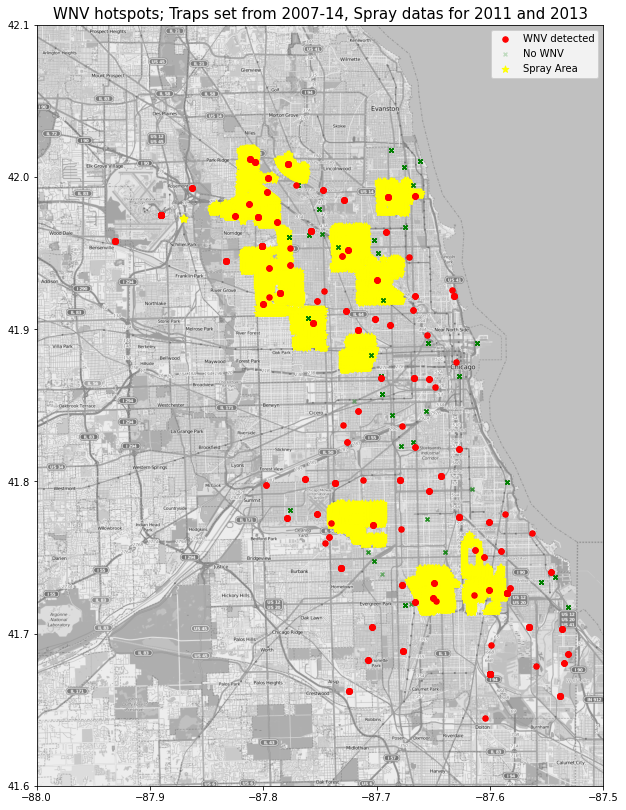

In [92]:
# Overview on the locations of traps, as well as the presence of the WNV
mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


wnv_traps = train_df.loc[train_df["WnvPresent"]==1]
ok_traps = train_df.loc[train_df["WnvPresent"]==0]

spray = plt.scatter(spray_df['Longitude'], spray_df['Latitude'], c="yellow", marker='*', s=50, alpha=1)
wnv_false = plt.scatter(ok_traps['Longitude'], ok_traps['Latitude'], c="green", marker='x', s=15, alpha=0.2)
wnv_true = plt.scatter(wnv_traps['Longitude'], wnv_traps['Latitude'], c="red", marker='o', s=30, alpha=1)

plt.title("WNV hotspots; Traps set from 2007-14, Spray datas for 2011 and 2013", fontsize=15)
plt.legend((wnv_true, wnv_false, spray), ("WNV detected", "No WNV", "Spray Area")); 

In [93]:
spray_grouped = spray_df.groupby(['year','month','week']).agg({'Latitude':pd.Series.nunique}).reset_index()
spray_grouped.rename(columns={'Latitude':'Count'}, inplace=True)
spray_grouped['year_month_week'] = spray_grouped['year'].astype(str) + "_" + spray_grouped['month'].astype(str) + "_" + spray_grouped['week'].astype(str)
spray_grouped

year  month  week   Count year_month_week
0  2011      9    36  1154.0       2011_9_36
1  2013      7    29  2051.0       2013_7_29
2  2013      7    30  1518.0       2013_7_30
3  2013      8    32  1132.0       2013_8_32
4  2013      8    33  2669.0       2013_8_33
5  2013      8    34  1519.0       2013_8_34
6  2013      8    35  2193.0       2013_8_35
7  2013      9    36   877.0       2013_9_36

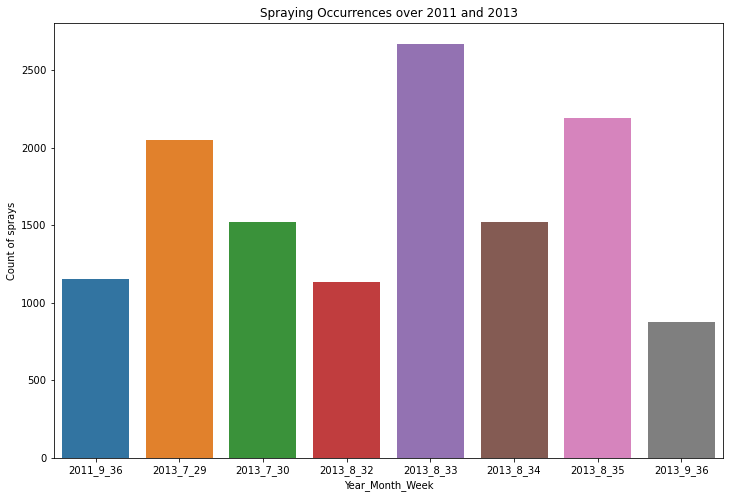

In [94]:
# Charting our time-series for Spray Occurences
plt.figure(figsize=(12, 8))
sns.barplot(y=spray_grouped.Count, x=spray_grouped.year_month_week)
plt.title("Spraying Occurrences over 2011 and 2013")
plt.xlabel("Year_Month_Week")
plt.ylabel("Count of sprays")
plt.show()

Observation: Because we only have spraying data from 2011 and 2013, it will have limited use in modeling. It can, however, be used to investigate the efficacy of WNV sprays and possibly recommend spraying frequency.

#### Effectiveness of Spray on WNV

In [95]:
#Creating a function that calculates the vincenty distance between each trap position and spray locations.  
#Trap will be assigned 1 if it's within 5km of the spray coordinates.
def traps_near_spray1(df_spray, df_trap):
    
    sprayed = []
    date = []
    longitude = []
    latitude = []
    year = []
    month = []

    
    for i in range(1):
        
        coords1 = (df_spray['Latitude'].values[i], df_spray['Longitude'].values[i])
    
        for j in range(len(df_trap)): 

            coords2 = (df_trap['Latitude'][j], df_trap['Longitude'][j])
            distance = geopy.distance.distance(coords1, coords2)

            if (distance < 5) and df_trap['year'][j] == df_spray['year'].values[i]: 
                
                sprayed.append(1)
                date.append(df_spray['Date'].values[i])
                longitude.append(df_spray['Longitude'].values[i])
                latitude.append(df_spray['Latitude'].values[i])
                year.append(df_spray['year'].astype(int).values[i]) 
                month.append(df_spray['month'].astype(int).values[i]) 
                
            else:

                sprayed.append(0)
                date.append(np.nan)
                longitude.append(np.nan)
                latitude.append(np.nan)
                year.append(np.nan) 
                month.append(np.nan) 
        
        df_trap['Date_spray'] = date
        df_trap['Longitude_spray'] = longitude
        df_trap['Latitude_spray'] = latitude
        df_trap['Year_spray'] = year
        df_trap['Month_spray'] = month
        df_trap['Sprayed'] = sprayed
        
    return

In [96]:
traps_near_spray1(spray_df,combined_train_df)

In [97]:
#Value counts for traps near spray coordinates
print(combined_train_df['Sprayed'].value_counts())

0    8256
1     219
Name: Sprayed, dtype: int64


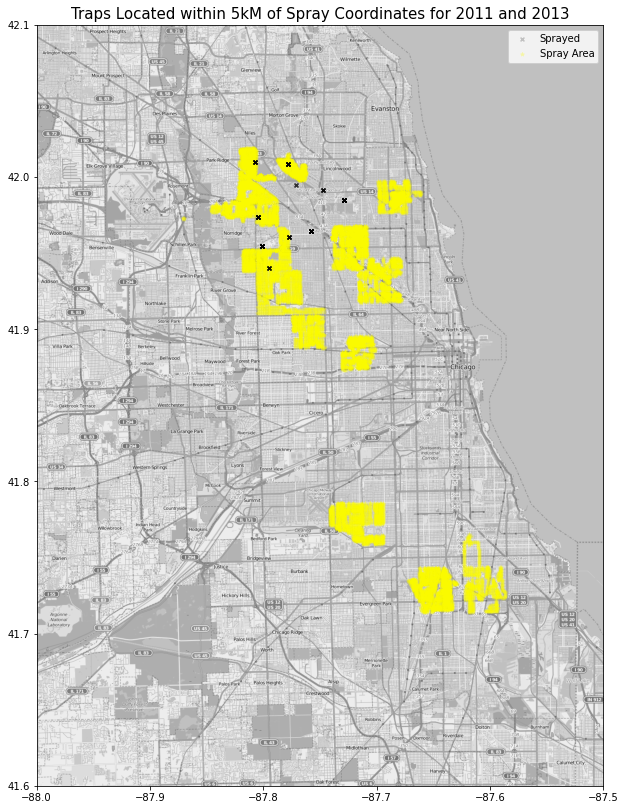

In [98]:
# Overview on the locations of traps near spray locations
mapdata = np.loadtxt("../datasets/raw/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


sprayed_traps = combined_train_df.loc[combined_train_df["Sprayed"]==1]
not_sprayed_traps = combined_train_df.loc[combined_train_df["Sprayed"]==0]

spray = plt.scatter(spray_df['Longitude'], spray_df['Latitude'], c="yellow", marker='*', s=15, alpha=0.2)
sprayed_plot = plt.scatter(sprayed_traps['Longitude'], sprayed_traps['Latitude'], c="black", marker='x', s=15, alpha=0.2)

plt.title("Traps Located within 5kM of Spray Coordinates for 2011 and 2013", fontsize=15)
plt.legend((sprayed_plot, spray), ("Sprayed", "Spray Area")); 

In [99]:
#For training dataset, reducing down the number of rows based on spray dates, WNV detection, 
#spray dates, and WNV caught.

combined_train_df[(combined_train_df['Sprayed']==1) & (combined_train_df['TotalWNV']>0) & (combined_train_df['year']==combined_train_df['Year_spray'])]

Date  year  month  week_x  Trap  TotalWNV  TotalNumMosquitos  \
5443 2011-07-29  2011      7      30  T223         1                 90   
5536 2011-08-05  2011      8      31  T008         1                 23   
5674 2011-08-12  2011      8      32  T223         1                  3   
5896 2011-08-26  2011      8      34  T223         1                  5   
5984 2011-09-01  2011      9      35  T003         1                 36   
5994 2011-09-01  2011      9      35  T027         1                  5   
6002 2011-09-01  2011      9      35  T223         1                 11   
6080 2011-09-12  2011      9      37  T003         1                 22   
6312 2011-09-23  2011      9      38  T002         1                 13   
6314 2011-09-23  2011      9      38  T003         1                 43   
6334 2011-09-23  2011      9      38  T223         1                 24   

       Latitude  Longitude  AddressAccuracy  ...  ResultDir  AvgSpeed  \
5443  41.973845 -87.805059                9  ...        4.0       5.9   
5536  42.008314 -87.777921                9  ...        5.0       5.5   
5674  41.973845 -87.805059                9  ...       19.0       8.5   
5896  41.973845 -87.805059                9  ...       26.0       3.3   
5984  41.964242 -87.757639                8  ...       21.0       5.9   
5994  41.984809 -87.728492                8  ...       21.0       5.9   
6002  41.973845 -87.805059                9  ...       21.0       5.9   
6080  41.964242 -87.757639                8  ...       23.0      10.9   
6312  41.954690 -87.800991                9  ...       36.0       7.0   
6314  41.964242 -87.757639                8  ...       36.0       7.0   
6334  41.973845 -87.805059                9  ...       36.0       7.0   

             RH  Trange  Date_spray  Longitude_spray  Latitude_spray  \
5443  67.830625    15.0  2011-09-07       -87.787777       41.981433   
5536  76.273148    14.0  2011-09-07       -87.787777       41.981433   
5674  66.934563    21.0  2011-09-07       -87.787777       41.981433   
5896  63.487994    24.0  2011-09-07       -87.787777       41.981433   
5984  69.382910    22.0  2011-09-07       -87.787777       41.981433   
5994  69.382910    22.0  2011-09-07       -87.787777       41.981433   
6002  69.382910    22.0  2011-09-07       -87.787777       41.981433   
6080  57.503552    22.0  2011-09-07       -87.787777       41.981433   
6312  66.356789    14.0  2011-09-07       -87.787777       41.981433   
6314  66.356789    14.0  2011-09-07       -87.787777       41.981433   
6334  66.356789    14.0  2011-09-07       -87.787777       41.981433   

      Year_spray  Month_spray  Sprayed  
5443      2011.0          9.0        1  
5536      2011.0          9.0        1  
5674      2011.0          9.0        1  
5896      2011.0          9.0        1  
5984      2011.0          9.0        1  
5994      2011.0          9.0        1  
6002      2011.0          9.0        1  
6080      2011.0          9.0        1  
6312      2011.0          9.0        1  
6314      2011.0          9.0        1  
6334      2011.0          9.0        1  

[11 rows x 160 columns]

Observation: trap (T223) that meets all of the requirements we've set and have enough data points to study. We'll now plot the timeframe in which mosquitos were caught in this trap and evaluate the spray's efficiency in reducing TotalNumMosquitoes.

In [100]:
T223_train_df = combined_train_df[(combined_train_df['Trap']=='T223') & (combined_train_df['year']!=2009) & (combined_train_df['year']!=2013)]
T223_train_df.head()

Date  year  month  week_x  Trap  TotalWNV  TotalNumMosquitos  \
4706 2011-06-10  2011      6      23  T223         0                  2   
4757 2011-06-17  2011      6      24  T223         0                 33   
5030 2011-07-11  2011      7      28  T223         0                 22   
5031 2011-07-11  2011      7      28  T223         0                 41   
5158 2011-07-15  2011      7      28  T223         0                118   

       Latitude  Longitude  AddressAccuracy  ...  ResultDir  AvgSpeed  \
4706  41.973845 -87.805059                9  ...        3.0       8.0   
4757  41.973845 -87.805059                9  ...        6.0       6.6   
5030  41.973845 -87.805059                9  ...       25.0       8.5   
5031  41.973845 -87.805059                9  ...       25.0       8.5   
5158  41.973845 -87.805059                9  ...        9.0       6.7   

             RH  Trange  Date_spray  Longitude_spray  Latitude_spray  \
4706  86.614127    18.0  2011-09-07       -87.787777       41.981433   
4757  68.196615    22.0  2011-09-07       -87.787777       41.981433   
5030  75.283572    17.0  2011-09-07       -87.787777       41.981433   
5031  75.283572    17.0  2011-09-07       -87.787777       41.981433   
5158  53.057219    17.0  2011-09-07       -87.787777       41.981433   

      Year_spray  Month_spray  Sprayed  
4706      2011.0          9.0        1  
4757      2011.0          9.0        1  
5030      2011.0          9.0        1  
5031      2011.0          9.0        1  
5158      2011.0          9.0        1  

[5 rows x 160 columns]

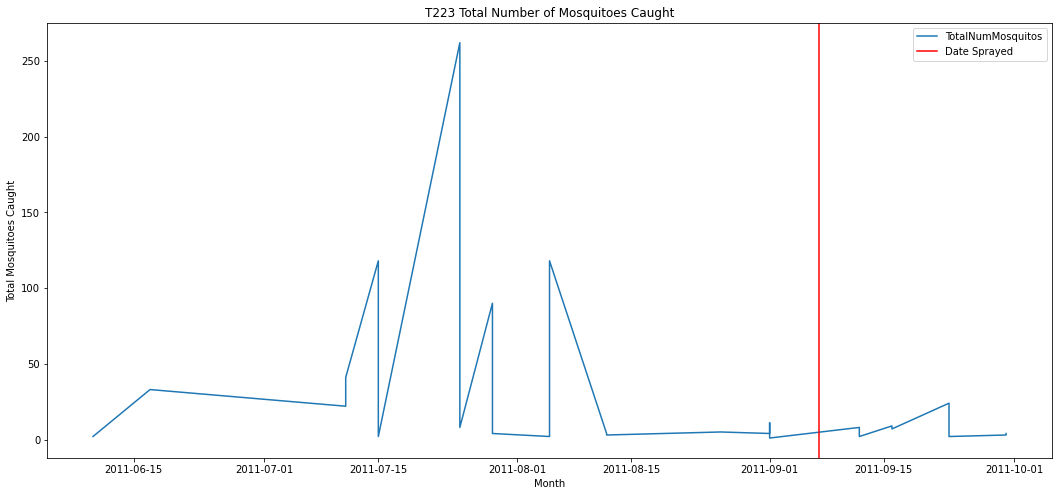

In [101]:
plt.figure(figsize=(18,8))
plt.plot('Date','TotalNumMosquitos', data = T223_train_df)
plt.title('T223 Total Number of Mosquitoes Caught')
plt.xlabel('Month')
plt.ylabel('Total Mosquitoes Caught')
plt.axvline(T223_train_df['Date_spray'].values[0], label = "Date Sprayed", color='red')
plt.legend(loc="upper right")
plt.show()

Observation: Before any spraying, the quantity of mosquitos in Trap T223 reduced considerably. As a result, it's difficult to draw any conclusions on the efficiency of pesticide spray in reducing mosquito populations. To better understand the effect of presticide on mosquitoes, it is recommended to start spraying during mid July instead of September.

In [102]:
spray_df.to_csv('../datasets/cleaned/cleaned_spray.csv',index=False)

In [103]:
#get_dummies for Trap data
combined_train_df = pd.get_dummies(data=combined_train_df, columns=['Trap'],drop_first=True)
combined_test_df = pd.get_dummies(data=combined_test_df, columns=['Trap'],drop_first=True)

In [104]:
#difference of columns between training and testing datasets

difference_ls_1 = combined_test_df.columns.difference(combined_train_df.columns)
difference_ls_1

Index(['Trap_T002A', 'Trap_T002B', 'Trap_T065A', 'Trap_T090A', 'Trap_T090B',
       'Trap_T090C', 'Trap_T128A', 'Trap_T200A', 'Trap_T200B', 'Trap_T218A',
       'Trap_T218B', 'Trap_T218C', 'Trap_T234'],
      dtype='object')

In [105]:
combined_train_df[difference_ls_1] = 0

In [106]:
combined_train_df = combined_train_df.drop(columns=['Date_spray', 'Latitude_spray', 'Longitude_spray', 'Month_spray',
                                           'Sprayed','Year_spray'])

In [107]:
combined_train_df.columns.difference(combined_test_df.columns)

Index(['TotalNumMosquitos', 'TotalWNV'], dtype='object')

In [108]:
#save cleaned train and test datasets 
combined_train_df.to_csv('../datasets/cleaned/combined_train_df.csv',index=False)
combined_test_df.to_csv('../datasets/cleaned/combined_test_df.csv',index=False)